In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# librerias
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

from pmdarima.arima import auto_arima
from pmdarima.arima import ARIMA

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
df= pd.read_csv("C:\\Users\\Flore\\THEBRIDGE\\2503_dsft_thebridge_FlorenciaGD\\3-Machine_Learning\\ML_Guide\\ML_Finance_Florencia\\dataset_limpio_indicePreciosConsumidor.csv", parse_dates = ['date'], index_col = 'date')
df

freq unit coicop geo    hicp
date                                   
2018-01-01    M  I15   CP00  AT  103.86
2018-01-01    M  I15   CP00  BE  103.82
2018-01-01    M  I15   CP00  BG  101.08
2018-01-01    M  I15   CP00  CY   96.47
2018-01-01    M  I15   CP00  CZ  104.40
...         ...  ...    ...  ..     ...
2024-12-01    M  I15   CP07  PT  123.18
2024-12-01    M  I15   CP07  RO  134.52
2024-12-01    M  I15   CP07  SE  134.66
2024-12-01    M  I15   CP07  SI  115.34
2024-12-01    M  I15   CP07  SK  133.10

[23973 rows x 5 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23973 entries, 2018-01-01 to 2024-12-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   freq    23973 non-null  object 
 1   unit    23973 non-null  object 
 2   coicop  23973 non-null  object 
 3   geo     23973 non-null  object 
 4   hicp    23973 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.1+ MB


In [6]:
df.describe()

hicp
count  23973.000000
mean     117.637320
std       20.152141
min       73.010000
25%      104.410000
50%      110.800000
75%      126.530000
max      233.820000

In [7]:
# Si no nos pilla bien la fecha
df['fecha_str'] = df.index.astype(str)

df[['year', 'month', 'day']] = df['fecha_str'].str.split('-', expand=True)
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)

df['new_date'] = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

freq unit coicop geo    hicp   fecha_str  year  month  day  \
date                                                                    
2018-01-01    M  I15   CP00  AT  103.86  2018-01-01  2018      1    1   
2018-01-01    M  I15   CP00  BE  103.82  2018-01-01  2018      1    1   
2018-01-01    M  I15   CP00  BG  101.08  2018-01-01  2018      1    1   
2018-01-01    M  I15   CP00  CY   96.47  2018-01-01  2018      1    1   
2018-01-01    M  I15   CP00  CZ  104.40  2018-01-01  2018      1    1   

             new_date  
date                   
2018-01-01 2018-01-01  
2018-01-01 2018-01-01  
2018-01-01 2018-01-01  
2018-01-01 2018-01-01  
2018-01-01 2018-01-01

In [8]:
df_2024= df[df.index <= "2024-12-01"]

In [9]:
df_2024

freq unit coicop geo    hicp   fecha_str  year  month  day  \
date                                                                    
2018-01-01    M  I15   CP00  AT  103.86  2018-01-01  2018      1    1   
2018-01-01    M  I15   CP00  BE  103.82  2018-01-01  2018      1    1   
2018-01-01    M  I15   CP00  BG  101.08  2018-01-01  2018      1    1   
2018-01-01    M  I15   CP00  CY   96.47  2018-01-01  2018      1    1   
2018-01-01    M  I15   CP00  CZ  104.40  2018-01-01  2018      1    1   
...         ...  ...    ...  ..     ...         ...   ...    ...  ...   
2024-12-01    M  I15   CP07  PT  123.18  2024-12-01  2024     12    1   
2024-12-01    M  I15   CP07  RO  134.52  2024-12-01  2024     12    1   
2024-12-01    M  I15   CP07  SE  134.66  2024-12-01  2024     12    1   
2024-12-01    M  I15   CP07  SI  115.34  2024-12-01  2024     12    1   
2024-12-01    M  I15   CP07  SK  133.10  2024-12-01  2024     12    1   

             new_date  
date                   
2018-01-01 2018-01-01  
2018-01-01 2018-01-01  
2018-01-01 2018-01-01  
2018-01-01 2018-01-01  
2018-01-01 2018-01-01  
...               ...  
2024-12-01 2024-12-01  
2024-12-01 2024-12-01  
2024-12-01 2024-12-01  
2024-12-01 2024-12-01  
2024-12-01 2024-12-01  

[23973 rows x 10 columns]

## Comparación países

FILTRADO POR PAÍS Y CATEGORÍA COICOP:

<Figure size 1500x700 with 0 Axes>

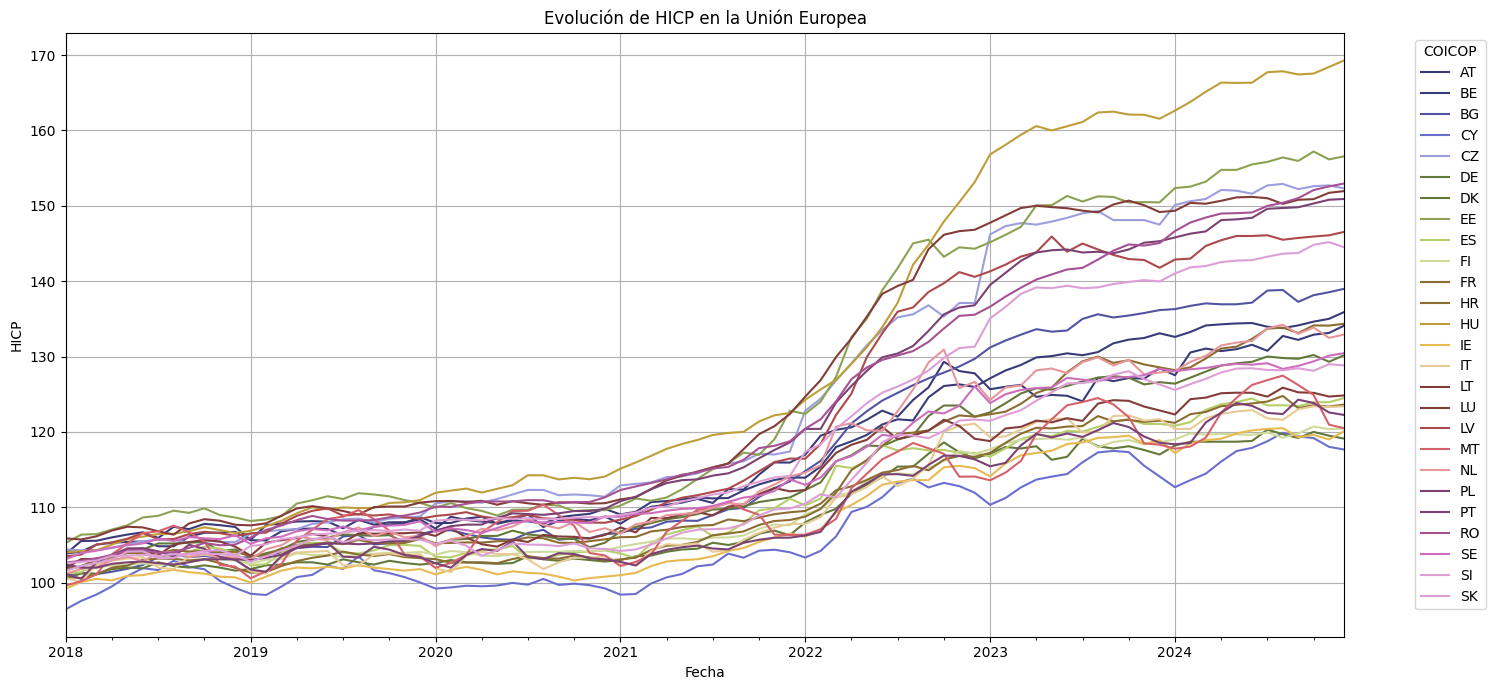

In [10]:
import matplotlib.pyplot as plt

paises= ['AT', 'BE', 'BG', 'CY', 'CZ', 'DE', 'DK',
        'EE', 'ES', 'FI', 'FR', 'HR', 'HU', 'IE', 'IT', 'LT', 'LU', 'LV', 'MT',
       'NL', 'PL', 'PT', 'RO', 'SE', 'SI', 'SK']

#Filtrar paises, coicops & fechas:
df_multi= df_2024[(df_2024["geo"].isin(paises)) & (df_2024["coicop"]== "CP00") & (df_2024["new_date"]>= "2018-01-01") & (df_2024["new_date"]<= "2024-12-01")]


# Pivotar para graficar
pivot_multi = df_multi.pivot(index='new_date', columns='geo', values='hicp')

pivot_multi

# Graficar
plt.figure(figsize=(15,7))
pivot_multi.plot(figsize=(15,7), colormap='tab20b')
plt.title('Evolución de HICP en la Unión Europea')
plt.xlabel('Fecha')
plt.ylabel('HICP')
plt.grid(True)
plt.legend(title='COICOP', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

DESCOMPOSICIÓN ESTACIONAL:

Separación de series en tendencia, estacionalidad y residuo (original y log-transformada).


 Descomposición estacional para: AT


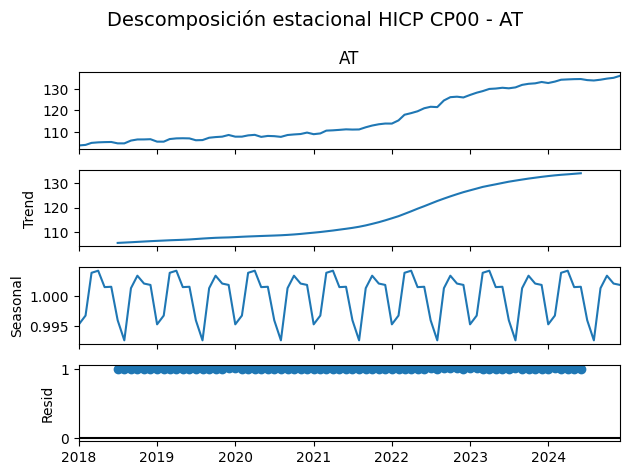


 Descomposición estacional para: BE


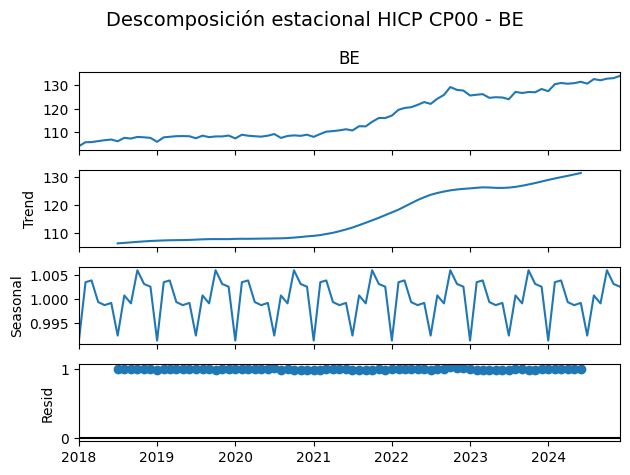


 Descomposición estacional para: BG


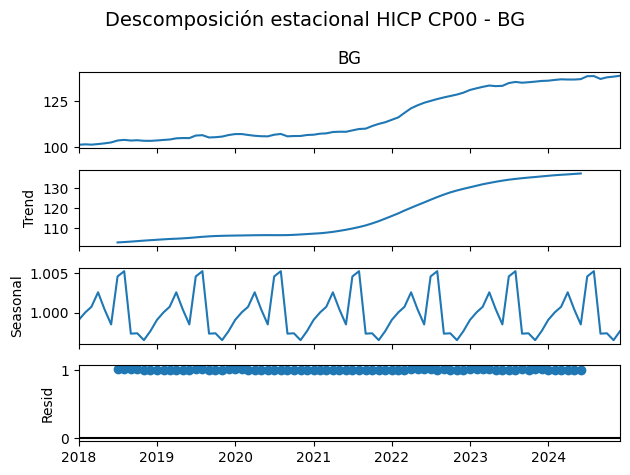


 Descomposición estacional para: CY


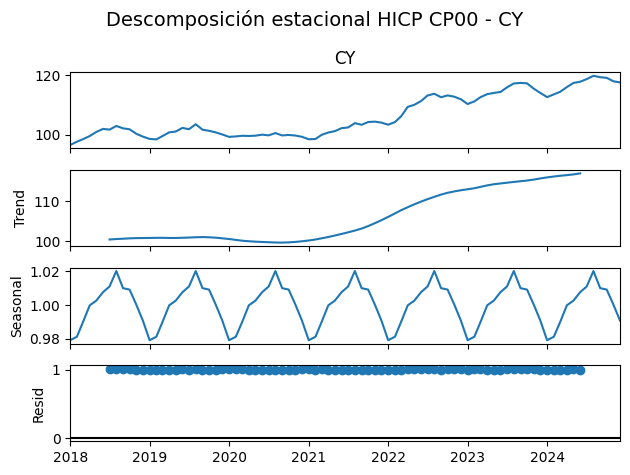


 Descomposición estacional para: CZ


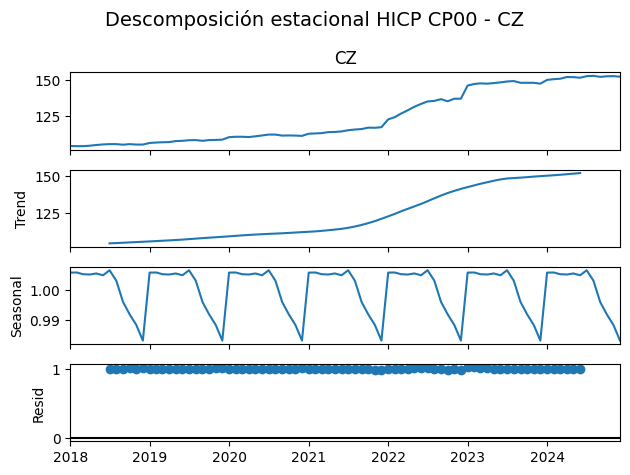


 Descomposición estacional para: DE


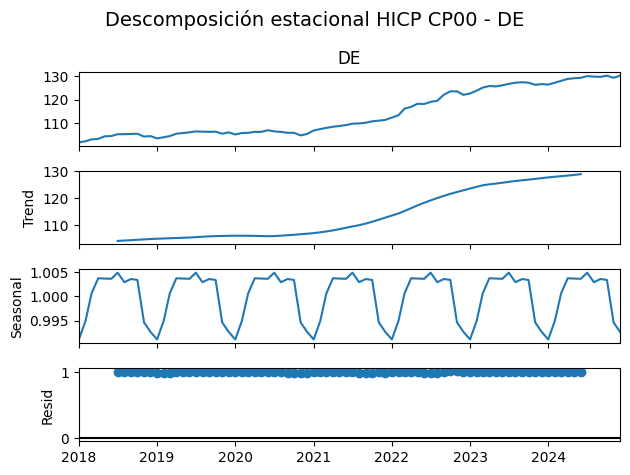


 Descomposición estacional para: DK


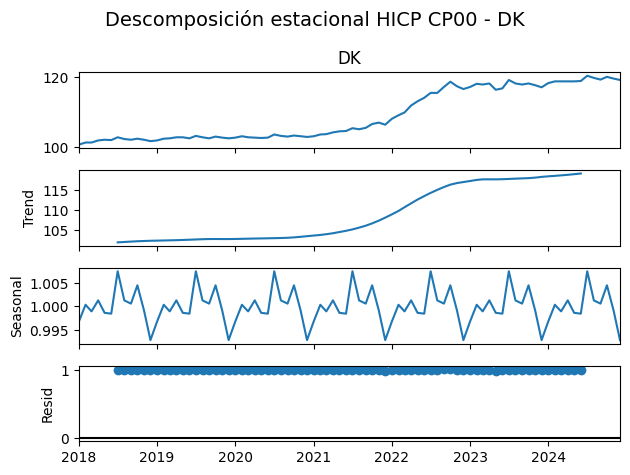


 Descomposición estacional para: EE


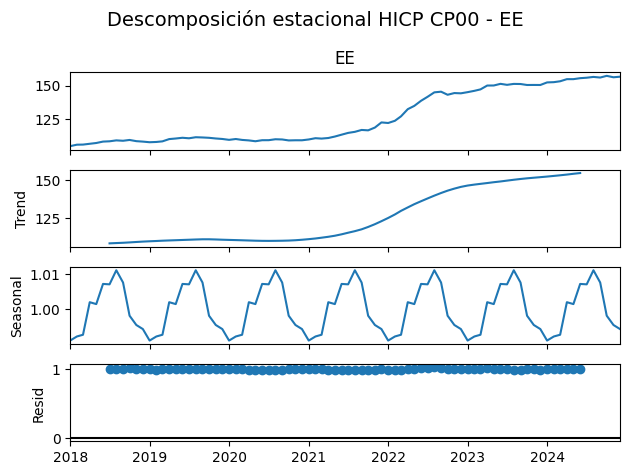


 Descomposición estacional para: ES


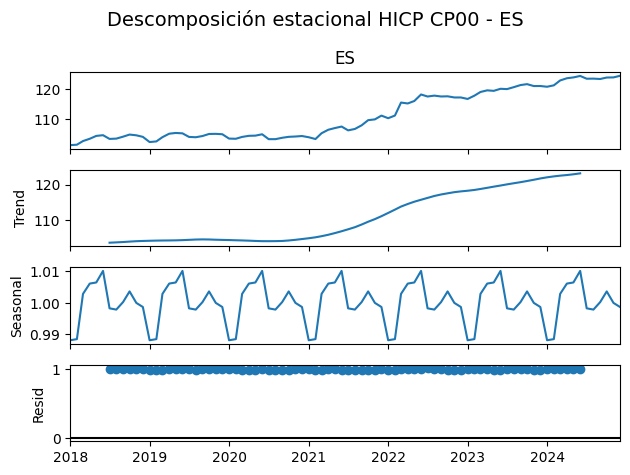


 Descomposición estacional para: FI


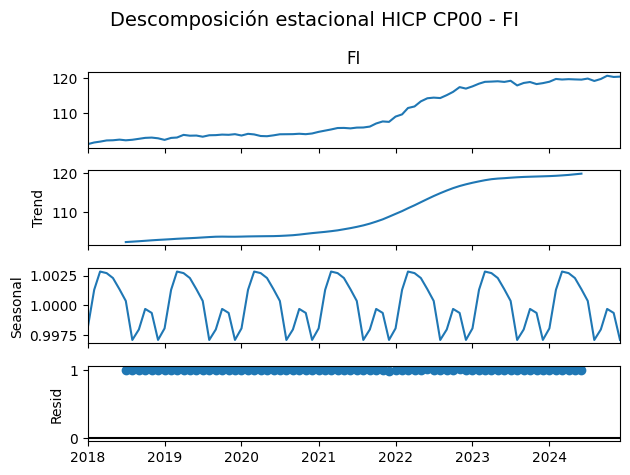


 Descomposición estacional para: FR


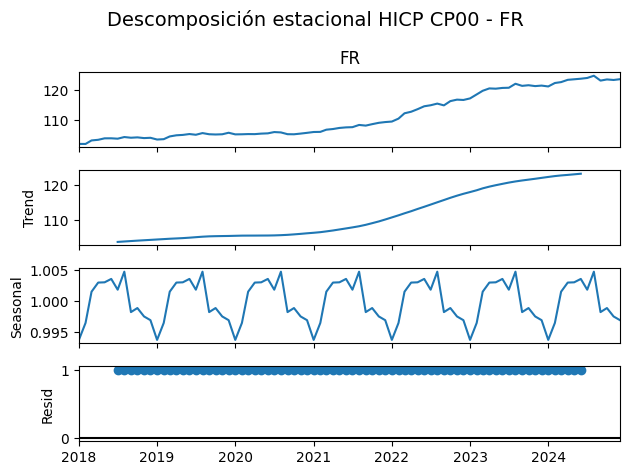


 Descomposición estacional para: HR


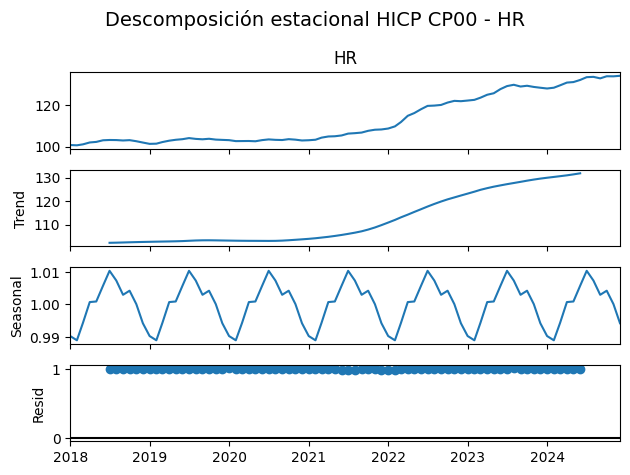


 Descomposición estacional para: HU


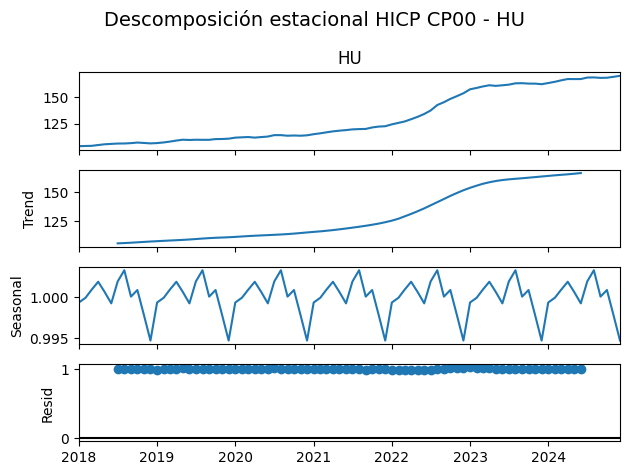


 Descomposición estacional para: IE


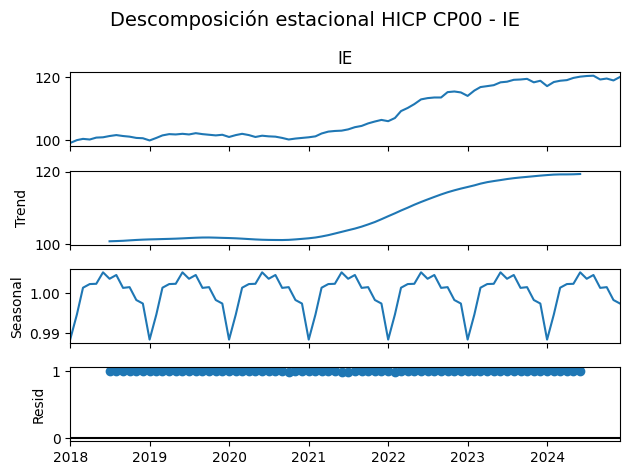


 Descomposición estacional para: IT


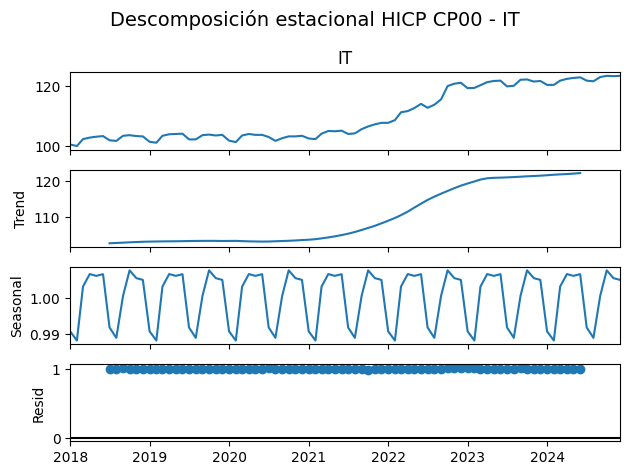


 Descomposición estacional para: LT


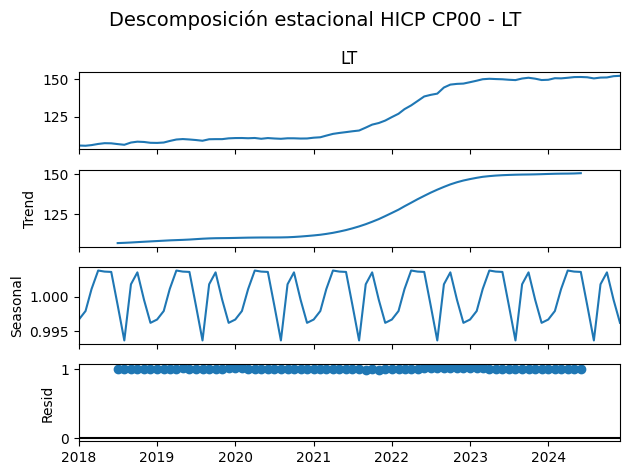


 Descomposición estacional para: LU


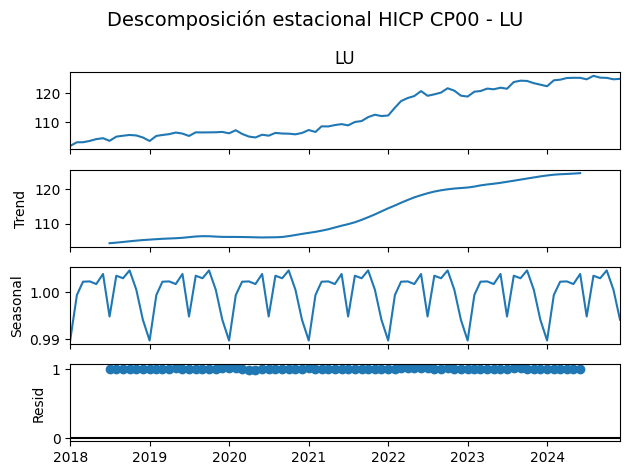


 Descomposición estacional para: LV


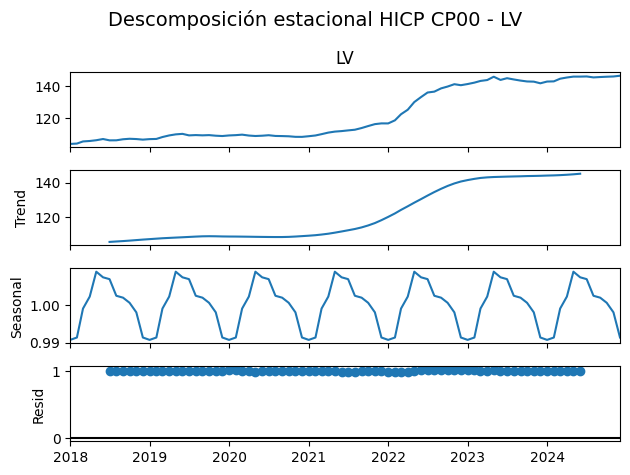


 Descomposición estacional para: MT


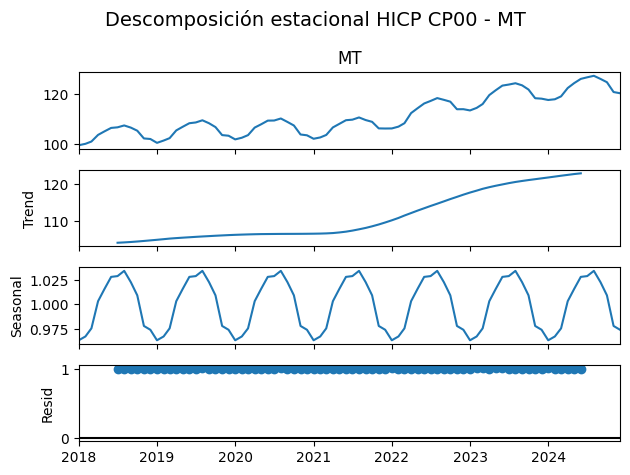


 Descomposición estacional para: NL


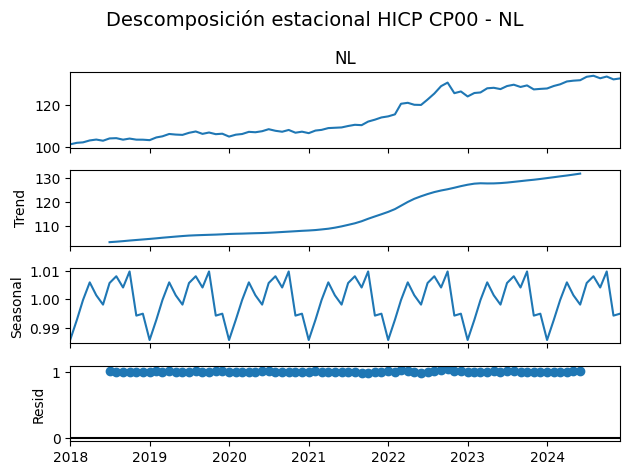


 Descomposición estacional para: PL


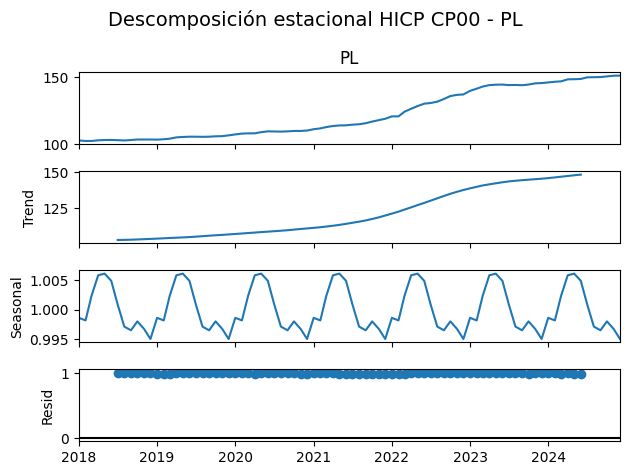


 Descomposición estacional para: PT


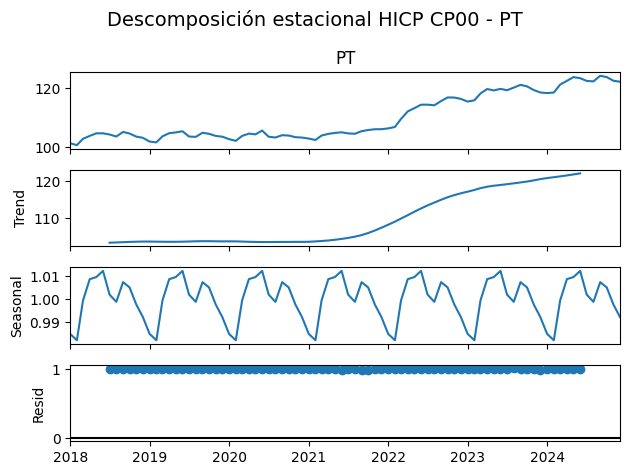


 Descomposición estacional para: RO


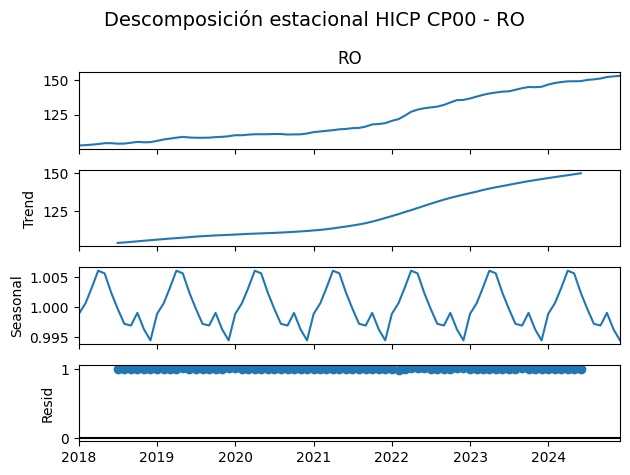


 Descomposición estacional para: SE


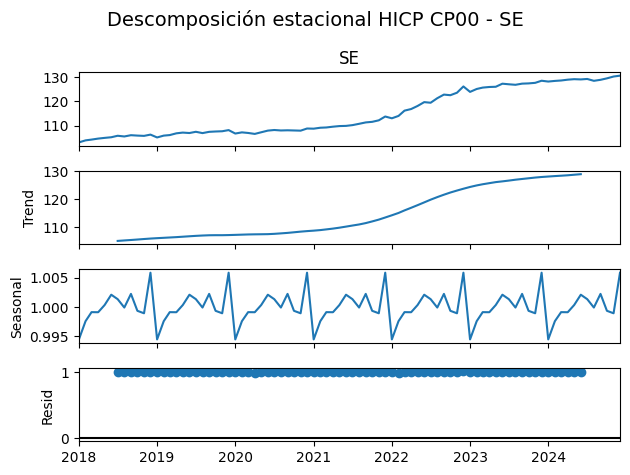


 Descomposición estacional para: SI


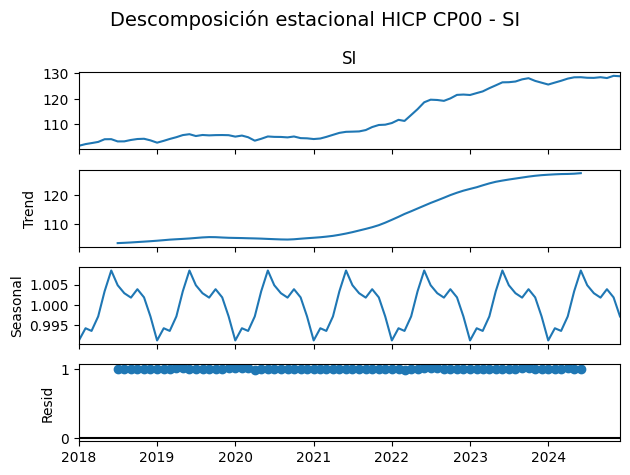


 Descomposición estacional para: SK


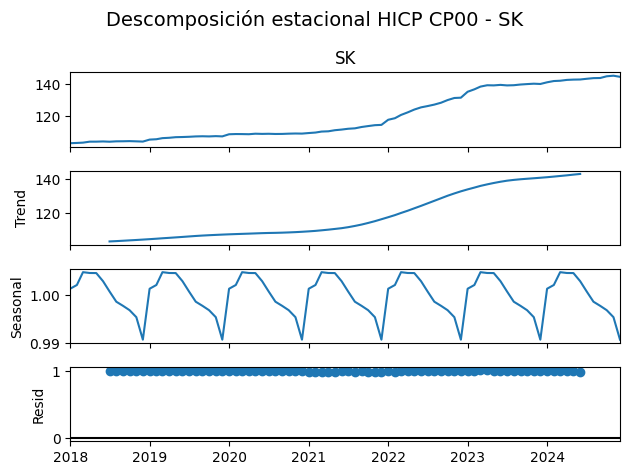

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

componentes_paises= {}
# Loop para descomponer cada país individualmente
for pais in pivot_multi.columns:
    print(f"\n Descomposición estacional para: {pais}")
    
    serie = pivot_multi[pais].dropna()  # elimino los valores que faltan

    if len(serie) < 24:  # Debe tener al menos 2 ciclos completos
        print(f"No hay suficientes datos para {pais}, se necesitan al menos 24 meses.")
        continue

    # Descomposición (asumimos estacionalidad anual mensual: 12)
    result = seasonal_decompose(serie, model='multiplicative', period=12) #descompongo la serie en tendencia, estacionalidad, y residuo (lo q no es tendencia ni estacionalidad)

#combinar componentes(junto los cuatro elementos en un solo df por países y añado columna país para identificarlo)
    df_reconstructed= pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis=1)
    df_reconstructed.columns= ["seasonal", "trend", "resid", "actual_values"]
    df_reconstructed["pais"] = pais

#guardar en el diciconario, con clave país: 

    componentes_paises[pais]= df_reconstructed

       # Plot
    result.plot()
    plt.suptitle(f'Descomposición estacional HICP CP00 - {pais}', fontsize=14)
    plt.tight_layout()
    plt.show()

#concatenar todos los países en un solo dataframe, lo pongo fuera del loop para que no se ejecute en cada iteración.
df_paises = pd.concat(componentes_paises.values())

Los residuos amplían o expanden particularmente a partir de 2022. Esto puede reflejar:

Mayores fluctuaciones en la inflación.

Datos menos predecibles o más volátiles que el modelo no puede capturar.

Eventos atípicos (como shocks económicos o inflación súbita) también pueden causar mayores residuos

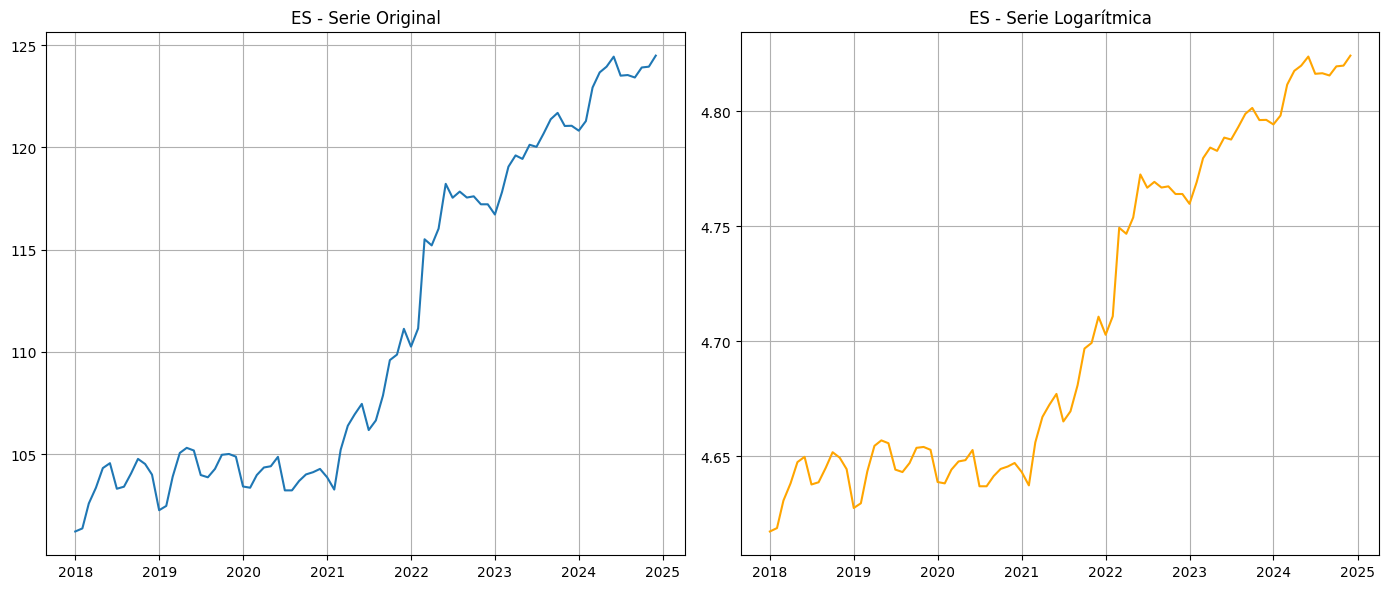

In [12]:
pais = "ES"
serie = pivot_multi[pais].dropna()

plt.figure(figsize=(14, 6))

# Gráfico original
plt.subplot(1, 2, 1)
plt.plot(serie, label="Original")
plt.title(f"{pais} - Serie Original")
plt.grid(True)

# Gráfico log-transformado
plt.subplot(1, 2, 2)
plt.plot(np.log(serie), label="Log-transformada", color='orange')
plt.title(f"{pais} - Serie Logarítmica")
plt.grid(True)

plt.tight_layout()
plt.show()

En este caso tendría que haber aplicado un modelo aditivo y no multiplicativo porque la transformación logarítmica no reduce drásticamente la variabilidad relativa, lo cual refuerza que no había una varianza creciente muy marcada que justificaría un modelo multiplicativo.


Si la variabilidad relativa es constante, es mejor usar un modelo multiplicativo.

Si la variabilidad absoluta es constante, es mejor un modelo aditivo.

(variabilidad relativa: cómo cambia la variación o amplitud de los datos en proporción a su nivel.)

Las oscilaciones parecen bastante uniformes sin importar el nivel del índice → la variabilidad es más bien absoluta.(visualmente no hay mucho cambio entre una gráfica y otra)

Por tanto, la serie no es relativa → modelo aditivo.

DESCOMPOSICIÓN LOG-TRANSFORMADA PARA TODOS LOS PAÍSES:


 Descomposición estacional log-transformada para: AT


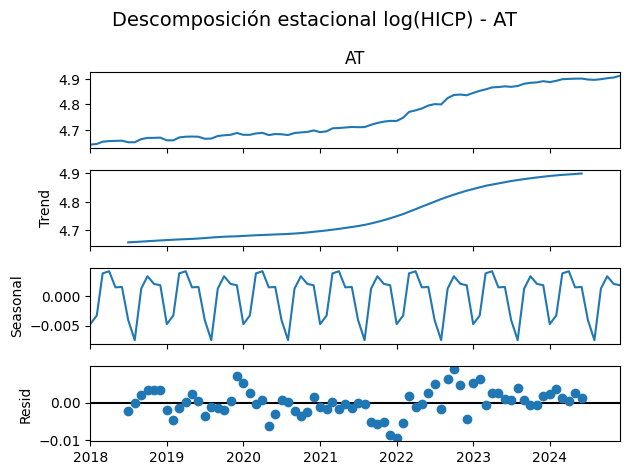


 Descomposición estacional log-transformada para: BE


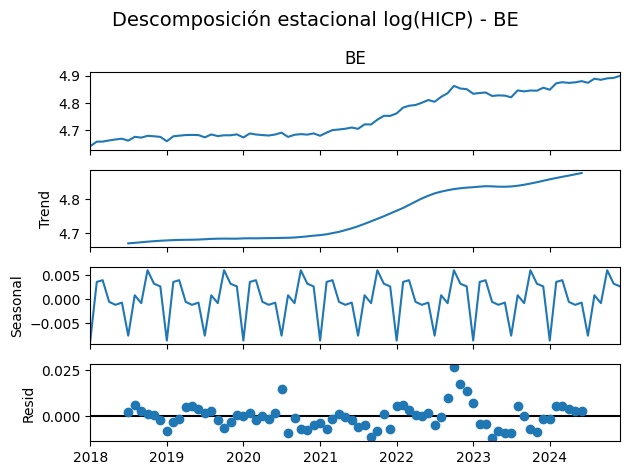


 Descomposición estacional log-transformada para: BG


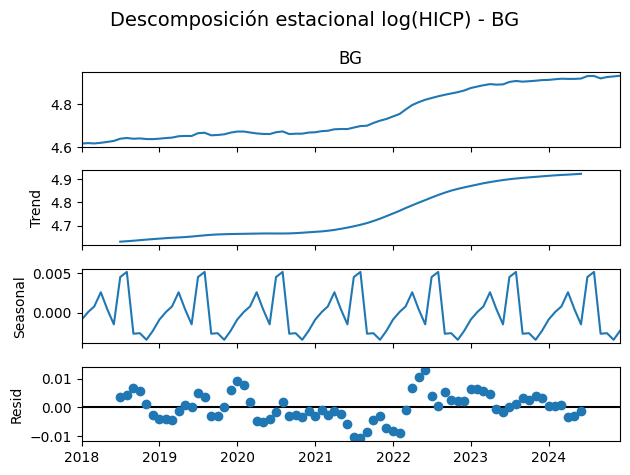


 Descomposición estacional log-transformada para: CY


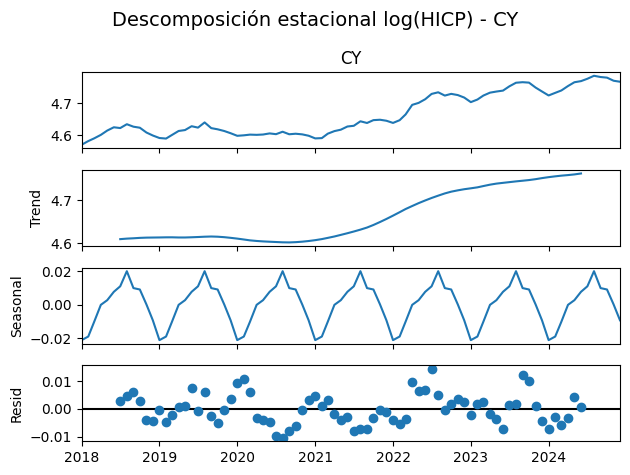


 Descomposición estacional log-transformada para: CZ


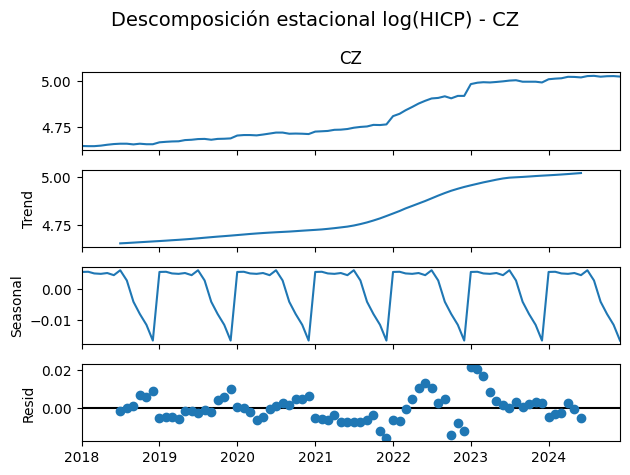


 Descomposición estacional log-transformada para: DE


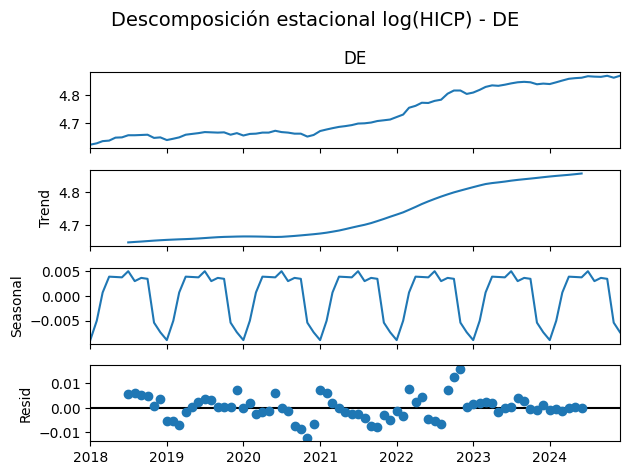


 Descomposición estacional log-transformada para: DK


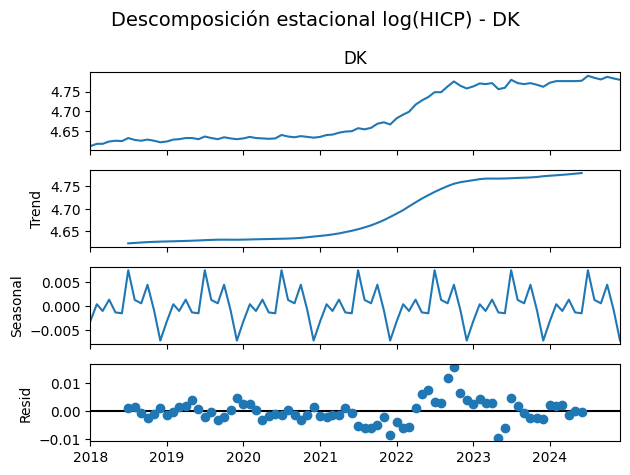


 Descomposición estacional log-transformada para: EE


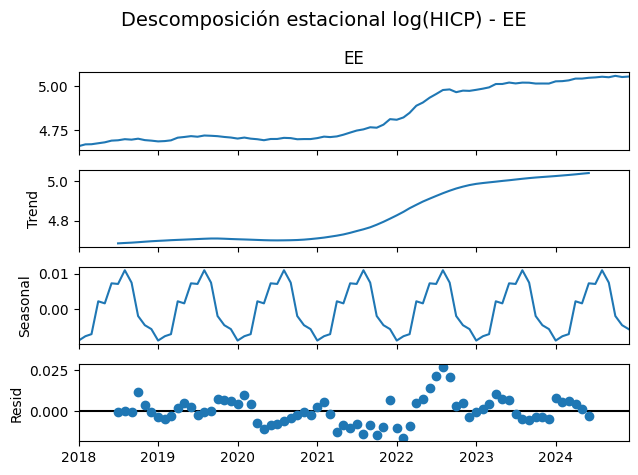


 Descomposición estacional log-transformada para: ES


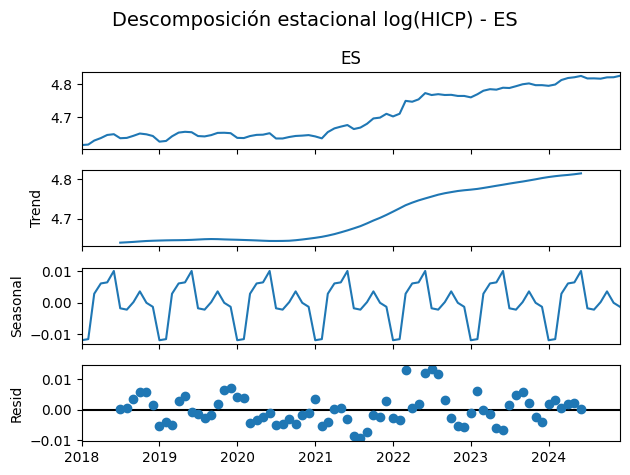


 Descomposición estacional log-transformada para: FI


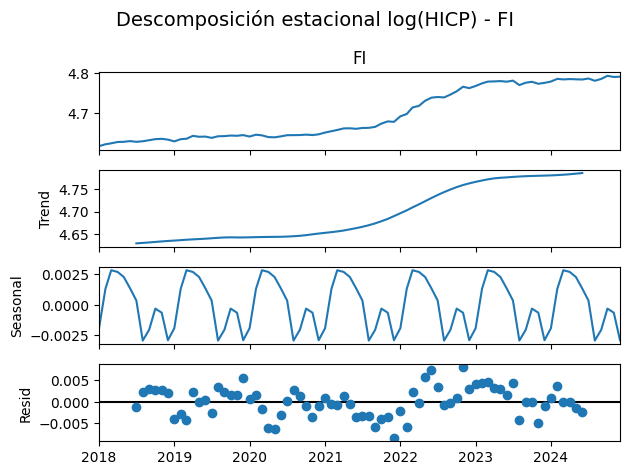


 Descomposición estacional log-transformada para: FR


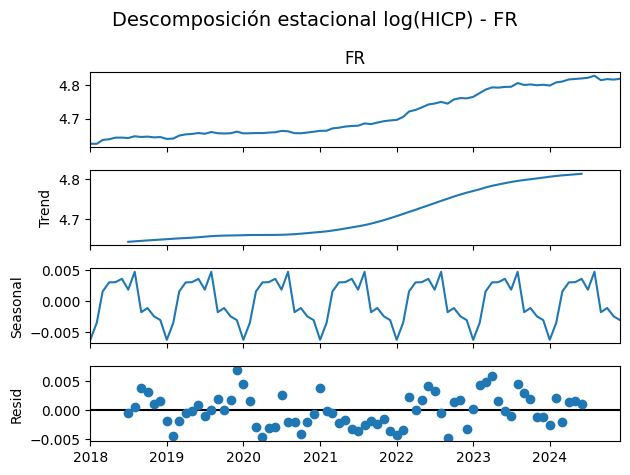


 Descomposición estacional log-transformada para: HR


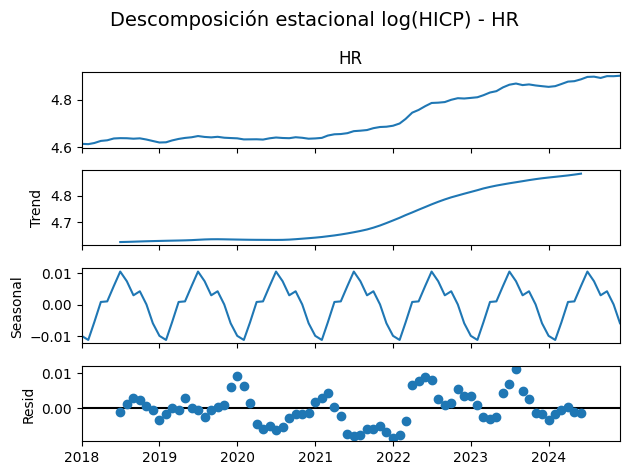


 Descomposición estacional log-transformada para: HU


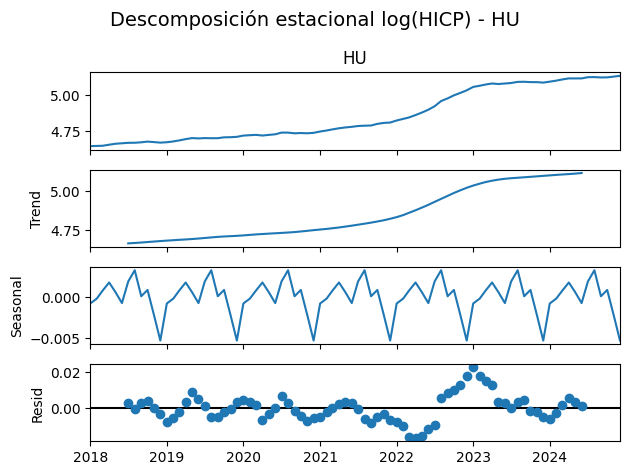


 Descomposición estacional log-transformada para: IE


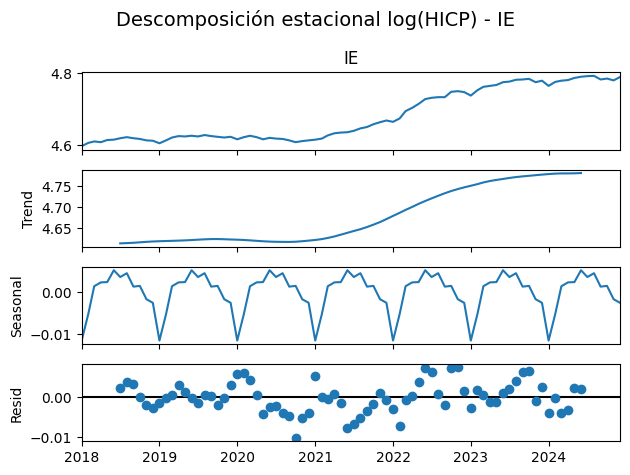


 Descomposición estacional log-transformada para: IT


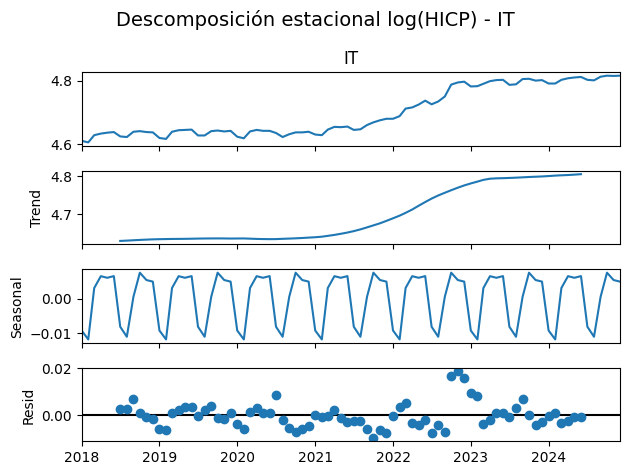


 Descomposición estacional log-transformada para: LT


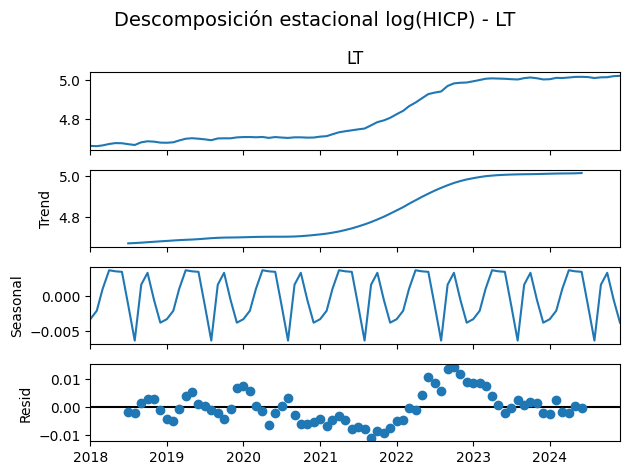


 Descomposición estacional log-transformada para: LU


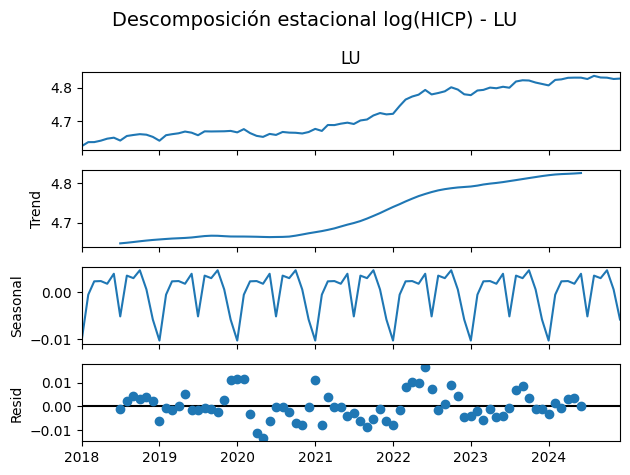


 Descomposición estacional log-transformada para: LV


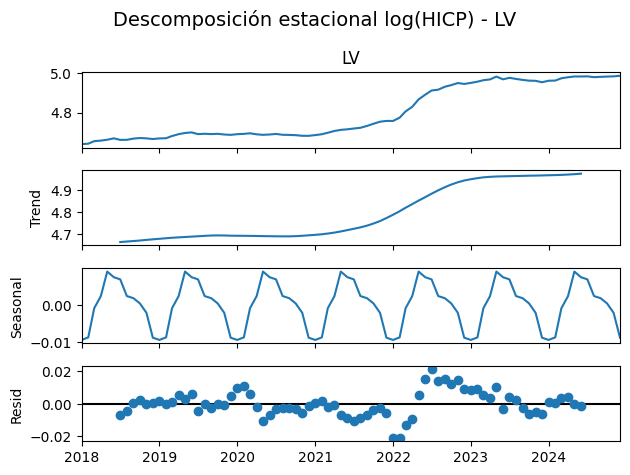


 Descomposición estacional log-transformada para: MT


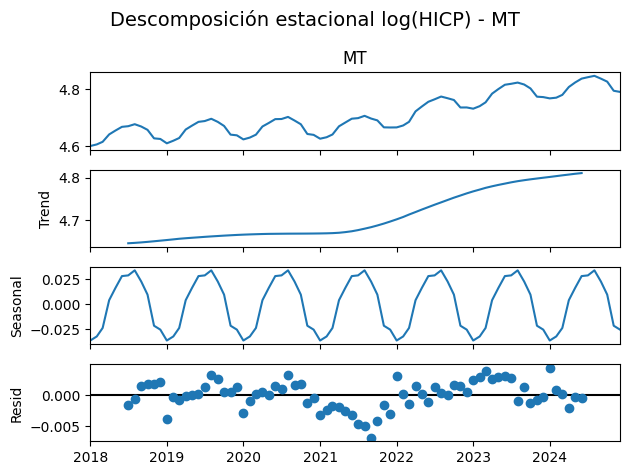


 Descomposición estacional log-transformada para: NL


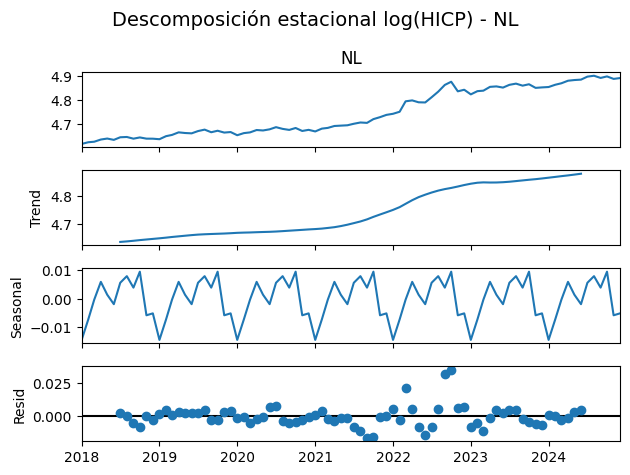


 Descomposición estacional log-transformada para: PL


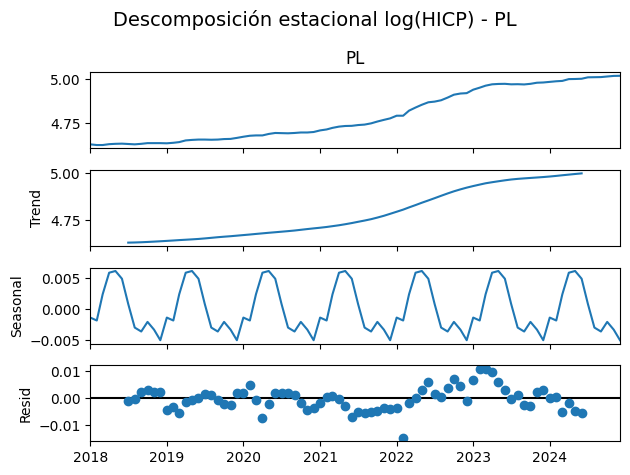


 Descomposición estacional log-transformada para: PT


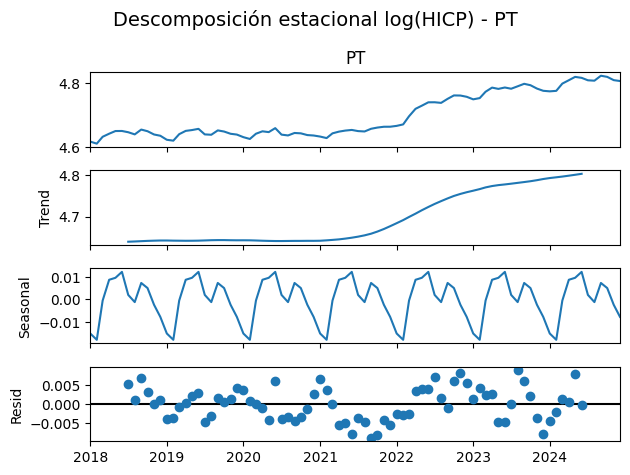


 Descomposición estacional log-transformada para: RO


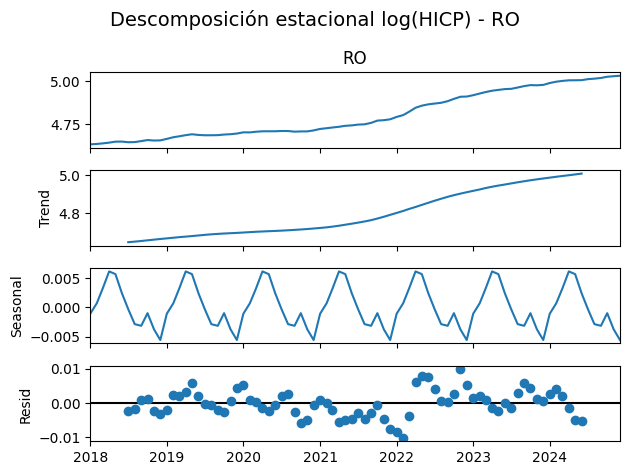


 Descomposición estacional log-transformada para: SE


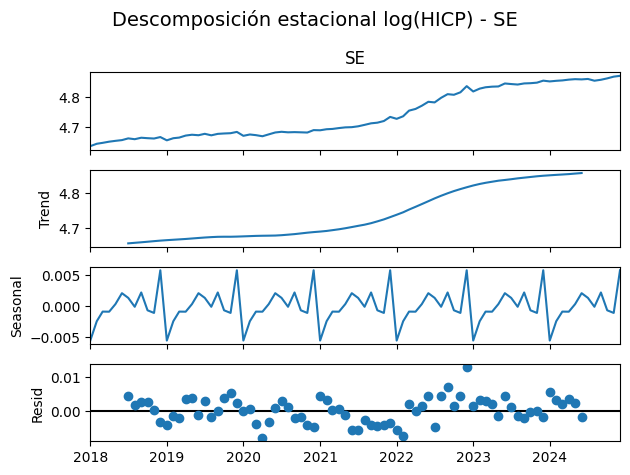


 Descomposición estacional log-transformada para: SI


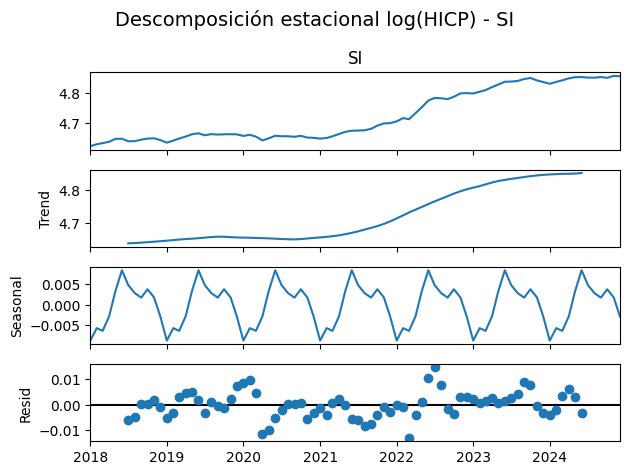


 Descomposición estacional log-transformada para: SK


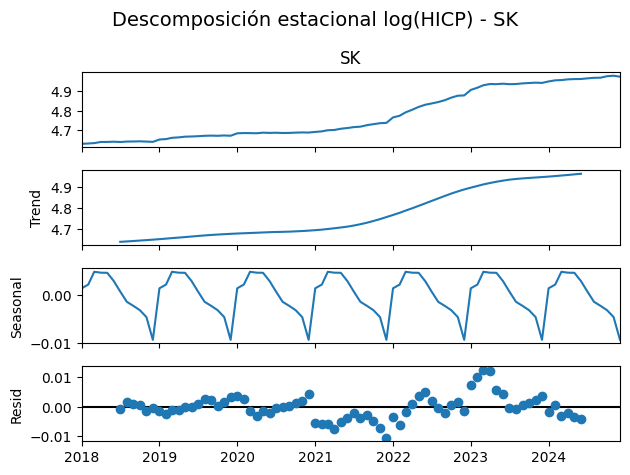

In [ ]:
componentes_log_paises = {}

for pais in pivot_multi.columns:
    print(f"\n Descomposición estacional log-transformada para: {pais}")
    
    serie = pivot_multi[pais].dropna()

    # Revisar si hay valores <= 0 si hay no se puede aplicar log
    if (serie <= 0).any():
        print(f"{pais}: Hay valores <= 0. No se puede aplicar log. Saltando.")
        continue

    if len(serie) < 24:
        print(f"{pais}: No hay suficientes datos para descomposición. Saltando.")
        continue

    log_serie = np.log(serie)

    # Descomposición log-transformada
    result = seasonal_decompose(log_serie, model='additive', period=12)

    # Guardar componentes
    df_reconstructed = pd.concat([result.seasonal, result.trend, result.resid, result.observed], axis=1)
    df_reconstructed.columns = ["seasonal_log", "trend_log", "resid_log", "log_values"]
    df_reconstructed["pais"] = pais

    componentes_log_paises[pais] = df_reconstructed

    # Graficar por país
    result.plot()
    plt.suptitle(f'Descomposición estacional log(HICP) - {pais}', fontsize=14)
    plt.tight_layout()
    plt.show()

In [14]:
# Concatenar todos en un solo DataFrame
df_log_paises = pd.concat(componentes_log_paises.values())
df_log_paises.head(20)

seasonal_log  trend_log  resid_log  log_values pais
new_date                                                       
2018-01-01     -0.004757        NaN        NaN    4.643044   AT
2018-02-01     -0.003296        NaN        NaN    4.645544   AT
2018-03-01      0.003845        NaN        NaN    4.654436   AT
2018-04-01      0.004206        NaN        NaN    4.656718   AT
2018-05-01      0.001479        NaN        NaN    4.657763   AT
2018-06-01      0.001541        NaN        NaN    4.658332   AT
2018-07-01     -0.004075   4.658535  -0.002120    4.652340   AT
2018-08-01     -0.007463   4.659828  -0.000120    4.652245   AT
2018-09-01      0.001269   4.661112   0.002096    4.664476   AT
2018-10-01      0.003356   4.662522   0.003392    4.669271   AT
2018-11-01      0.002062   4.663938   0.003459    4.669459   AT
2018-12-01      0.001834   4.665283   0.003279    4.670396   AT
2019-01-01     -0.004757   4.666494  -0.001890    4.659848   AT
2019-02-01     -0.003296   4.667659  -0.004609    4.659753   AT
2019-03-01      0.003845   4.668770  -0.001563    4.671052   AT
2019-04-01      0.004206   4.669709   0.000036    4.673950   AT
2019-05-01      0.001479   4.670633   0.002398    4.674510   AT
2019-06-01      0.001541   4.671885   0.000431    4.673856   AT
2019-07-01     -0.004075   4.673533  -0.003569    4.665889   AT
2019-08-01     -0.007463   4.675328  -0.001223    4.666642   AT

Visualización y análisis de residuos,Boxplot de residuos logarítmicos y tendencias por país.

BOXPLOT DE RESIDUOS:

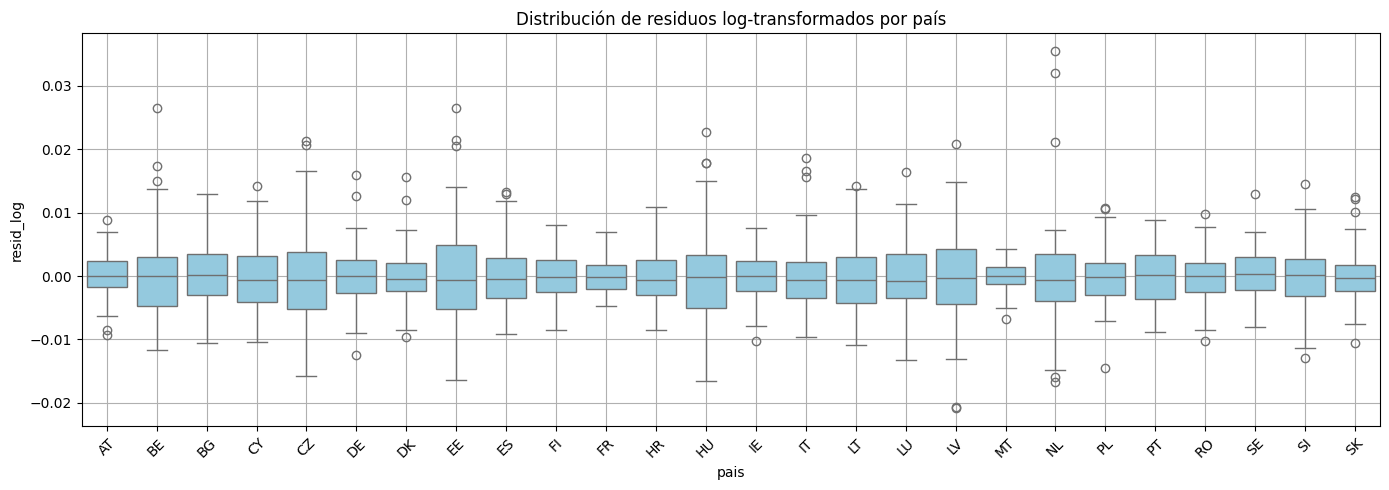

In [15]:
import seaborn as sns
df_log_plot = df_log_paises.reset_index()

plt.figure(figsize=(14, 5))
sns.boxplot(data=df_log_plot, x="pais", y="resid_log", color="skyblue")
plt.title("Distribución de residuos log-transformados por país")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

muestra la distribución de los residuos log-transformados por país, después de descomponer la serie HICP en tendencia + estacionalidad + residuo.

1. Mediana cercana 0. La mayoría. Casi todos los países tienen la línea central de la caja, la mediana, muy cerca del 0. Esto es buena señal porque significa que el modelo no tiene sesgo sistemático (ni sobre ni subestima en promedio)

2. Dispersión estrecha. Muchas cajas son bastantes estrechas, como Austria, Francia, Malta, Eslovequia. Indica que los residuos están concentrados y el modelo explica bien la serie.
3. Países con mayor dispersión: Estonia, Hungría, Letonia, República Checa. Tienen cajas más anchas, más outliers por lo que tienen:
    -  Peor ajuste del modelo log-transformado para esos países 
    - Posibles eventos atípicos como shocks inflacionarios puntuales.
4. Simetría vs sesgo. La mayoría de los boxplots son bastante simétricos, los bigotes están bastante equilibrados lo que indica que los errores se distribuyen de manera uniforme lo que es buenna señal.

(Los puntos fuera de este rango son outliers: residuos que se alejan mucho del comportamiento típico.)

Pocos ooutliers --> El modelo capta bien la estacionalidad y la tendencia

GRÁFICA DE TENDENCIA POR PAÍS

<Figure size 1500x700 with 0 Axes>

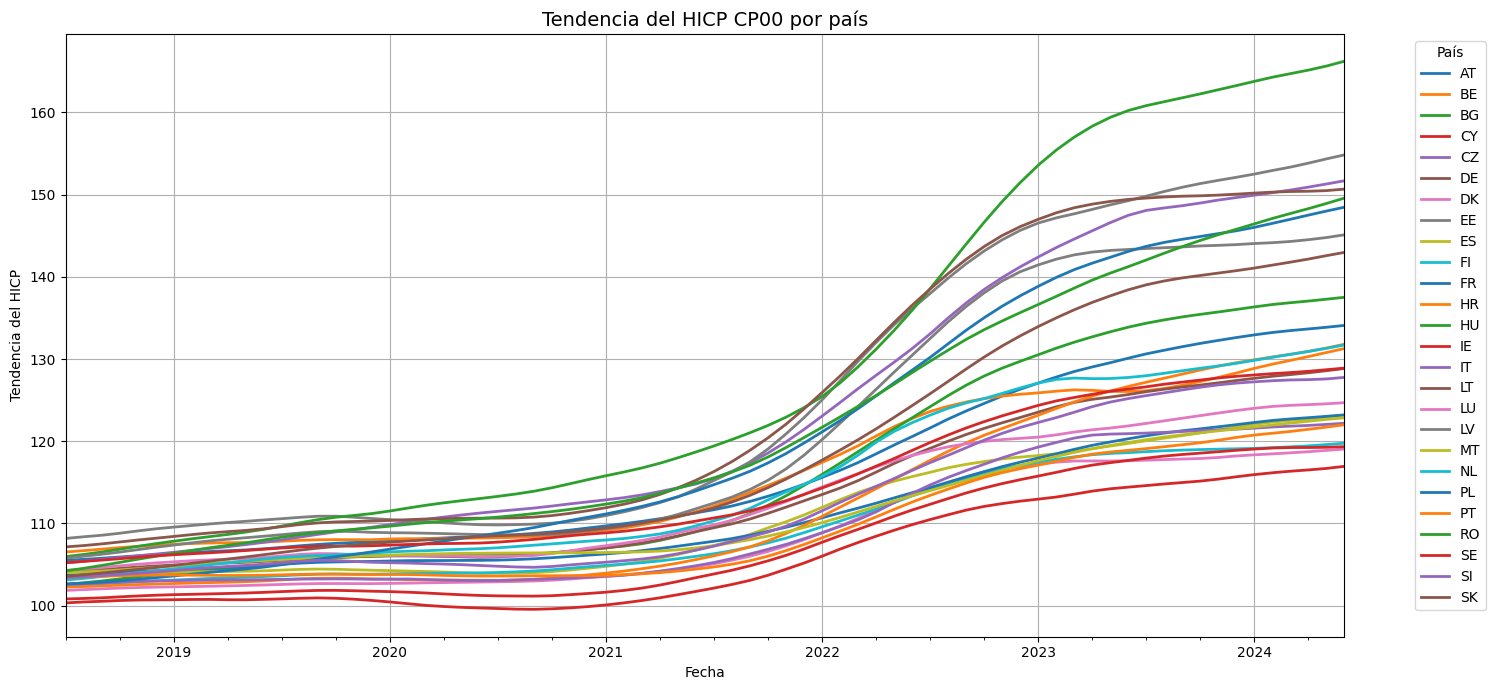

In [16]:
#Filtrar trend
df_tendencias = df_paises[['trend', 'pais']].dropna()

# Pivotamos para que cada país sea una columna
df_tendencias_pivot = df_tendencias.pivot_table(index=df_tendencias.index, columns='pais', values='trend')

# Aseguramos frecuencia mensual (por estética del gráfico)
df_tendencias_pivot = df_tendencias_pivot.asfreq('MS')

# Graficamos
plt.figure(figsize=(15, 7))
df_tendencias_pivot.plot(figsize=(15, 7), linewidth=2)

plt.title('Tendencia del HICP CP00 por país', fontsize=14)
plt.xlabel('Fecha')
plt.ylabel('Tendencia del HICP')
plt.grid(True)
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()




In [15]:
from statsmodels.tsa.stattools import adfuller, kpss

#print("Test de estacionariedad")
#for pais in df_paises["pais"].unique():
#    serie= df_paises[df_paises["pais"]== pais]["trend"].dropna()
#    serie_dif = serie.diff().dropna()
#    if len(serie)<12:
#        print(f"{pais}: no hay suficientes datos")
#        continue
#    resultado= adfuller(serie)
#    p_valor= resultado[1]

    #estado = "Estacionaria" if p_valor < 0.05 else "NO estacionaria"
    #print(f"{pais}: p-valor = {p_valor:.4f} {estado}")
    
#test ADF
#    p_valor= adfuller(serie_dif)[1]    
#    estado = "Estacionaria" if p_valor < 0.05 else "NO estacionaria"
#    print(f"{pais}: p-valor = {p_valor:.4f} {estado}")        

In [16]:
#print("Chequeo de estacionariedad por país 2:")

#for pais in df_paises["pais"].unique():
#    serie = df_paises[df_paises["pais"] == pais]["trend"].dropna()

#    if len(serie) < 24:
#        print(f"{pais}: no hay suficientes datos.")
#        continue

    # Prueba original
#    p_original = adfuller(serie)[1]
#    if p_original < 0.05:
#        print(f"{pais}: Estacionaria sin diferenciar (p={p_original:.4f})")
#        continue

    # Prueba 1ª diferencia
#    serie_1dif = serie.diff().dropna()
#    p_1dif = adfuller(serie_1dif)[1]
#    if p_1dif < 0.05:
#        print(f"{pais}: Estacionaria con 1ª diferencia (p={p_1dif:.4f})")
#        continue

    # Prueba 2ª diferencia
#    serie_2dif = serie_1dif.diff().dropna()
#    p_2dif = adfuller(serie_2dif)[1]
#    if p_2dif < 0.05:
#        print(f"{pais}: Estacionaria con 2ª diferencia (p={p_2dif:.4f})")
#    else:
#        print(f"{pais}: NO estacionaria ni con 2 diferencias (p={p_2dif:.4f})")

In [17]:
d_por_paises= {"BE":2, "IT":2, "FR":2, "ES":2, "PL":2, "NL":1, "DE":2 }

In [18]:
paises_sel= list(d_por_paises.keys())

In [19]:
df_paises

seasonal  trend  resid  actual_values pais
new_date                                              
2018-01-01  0.995243    NaN    NaN         103.86   AT
2018-02-01  0.996709    NaN    NaN         104.12   AT
2018-03-01  1.003851    NaN    NaN         105.05   AT
2018-04-01  1.004201    NaN    NaN         105.29   AT
2018-05-01  1.001459    NaN    NaN         105.40   AT
...              ...    ...    ...            ...  ...
2024-08-01  0.998583    NaN    NaN         143.65   SK
2024-09-01  0.997716    NaN    NaN         143.73   SK
2024-10-01  0.996810    NaN    NaN         144.82   SK
2024-11-01  0.995350    NaN    NaN         145.18   SK
2024-12-01  0.990644    NaN    NaN         144.48   SK

[2184 rows x 5 columns]

## PREDECIR EL HICP COMPLETO CON TENDENCIA + ESTACIONALIDAD + RUIDO
AUTOARIMA: ENTRENAMIENTO + TESTEO (ÚLTIMOS DOS MESES)

 ARIMA - Entrenamiento y predicción,"Modelos ARIMA por país, evaluación con ACF, PACF, Ljung-Box y predicción futura.

AUTOCORRELACIÓN Y ESTRUCTURA DE RESIDUOS POR PAÍS:
Test Ljung-Box: Prueba estadística para comprobar si una serie de residuos está autocorrelacionada o no:

- Autocorrelación: Los valores actuales se parecen a los pasados--> el modelo no capturó toda la información 

- Residuos sin autocorrelación: el modelo es estadísticamente adecuado.

> 0.05 No hay evidencias de autocorrelación --> Esto es bueno porque el modelo a capturado la estructura

<= 0.05 Hay autocorrelación estadísticamente significativa --> Mal el modelo dejó estructura sin explicar

In [20]:
#ANALIZO LA CAPACIDAD DEL MODELO PARA AJUSTARSE AL PASADO
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

def analizar_y_predecir_arima(paises, pivot_multi, lags=24, n_periodos=12): #24 meses para que capte bien las estacionalidades
    predicciones_dict= {}
    for pais in paises:
        print(f"\n=== {pais}: Evaluando modelo ARIMA y predicción ===")

        try:
            serie = pivot_multi[pais].dropna()

            # Separar train y test (opcional si solo predices a futuro)
            train = serie[serie.index <= "2024-10-01"]

            # Entrenamiento ARIMA
            modelo = auto_arima(
                train,
                start_p=1, start_q=1,
                max_p=5, max_q=5,
                d=None,
                seasonal=True,
                m=12,
                stepwise=True,
                suppress_warnings=True,
                error_action="ignore"
            )

            # --- Evaluar residuos ---
            pred_in_sample = modelo.predict_in_sample()
            residuos = train - pred_in_sample
            residuos = residuos.dropna()

            if len(residuos) < lags:
                print(f"{pais}: No hay suficientes residuos (min {lags})") 
                continue

            # Ljung-Box test Prueba estadística para comprobar si una serie de residuos está correlacionada o no
            ljung = acorr_ljungbox(residuos, lags=[lags], return_df=True)  #numero de lags a tener en cuenta en este caso 24 meses
    
            p_value = ljung['lb_pvalue'].values[0] #nos indica si hay autocorrelación o no
            print(f"Ljung-Box p-value (lag {lags}): {p_value:.4f} → {'Ruido blanco' if p_value > 0.05 else 'Autocorrelación detectada'}")

            # ACF/PACF
            plt.figure(figsize=(12, 5))
            plt.subplot(1, 2, 1)
            plot_acf(residuos, lags=lags, ax=plt.gca()) #Autocorrelation Function: identifica q en arima Qué tan parecido son los valores de hoy con los de hace un mes, dos, etc.? se calcula para multiples lags. Sirve para detectar estacionalidad, ver si hay memoria temporal
            plt.title(f"ACF - Residuos ARIMA completo {pais}")

            plt.subplot(1, 2, 2)
            plot_pacf(residuos, lags=lags, ax=plt.gca()) #Partial Autocorrelation Function:identifica p en arima Dice la relación directa de hoy y el valor de hace dos periodos descontando el efecto del valor del lag1. Sirve para identificar la cantidad de dependencia directa ayuda a decidir el parametro p en un modelo de arima
            plt.title(f"PACF - Residuos ARIMA completo {pais}")
            plt.tight_layout()
            plt.show()

            # --- Predicción futura ---
            forecast = modelo.predict(n_periods=n_periodos)

            fecha_inicio = train.index[-1] + pd.DateOffset(months=1)
            fechas_pred = pd.date_range(start=fecha_inicio, periods=n_periodos, freq='MS')
            predicciones_dict[pais] = pd.Series(forecast, index=fechas_pred)

            plt.figure(figsize=(10, 5))
            plt.plot(train, label="Serie original (train)")
            plt.plot(fechas_pred, forecast, label="Predicción futura", linestyle="--")
            plt.title(f"Predicción ARIMA ({pais}) - Próximos {n_periodos} meses")
            plt.legend()
            plt.show()

        except Exception as e:
            print(f"Error en {pais}: {e}")
    df_predicciones = pd.DataFrame(predicciones_dict)
    return df_predicciones


=== BE: Evaluando modelo ARIMA y predicción ===
Ljung-Box p-value (lag 24): 1.0000 → Ruido blanco


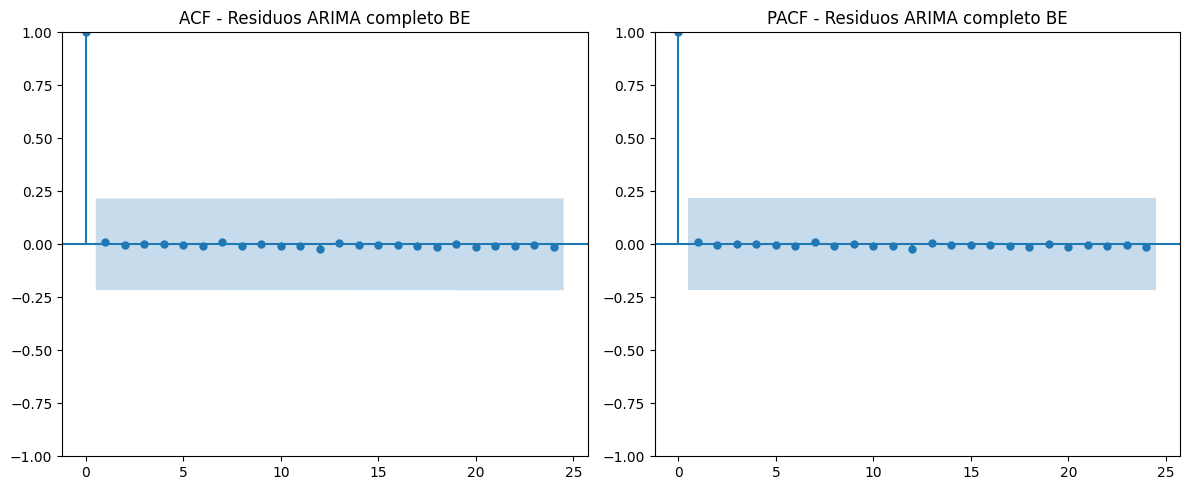

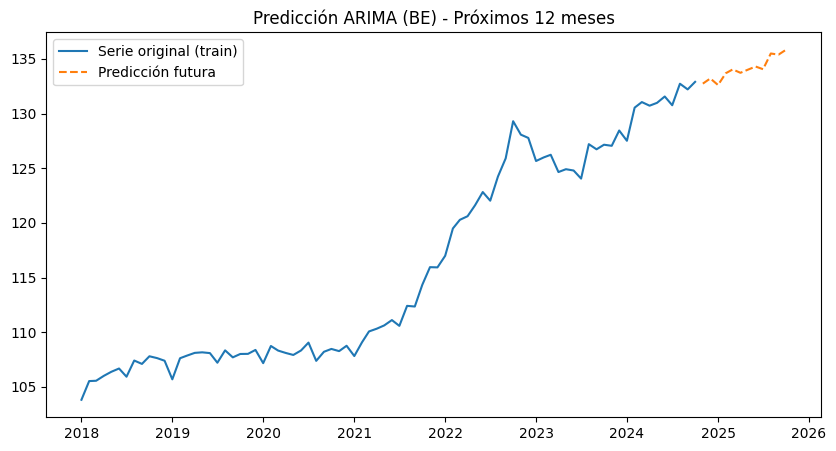


=== IT: Evaluando modelo ARIMA y predicción ===
Ljung-Box p-value (lag 24): 1.0000 → Ruido blanco


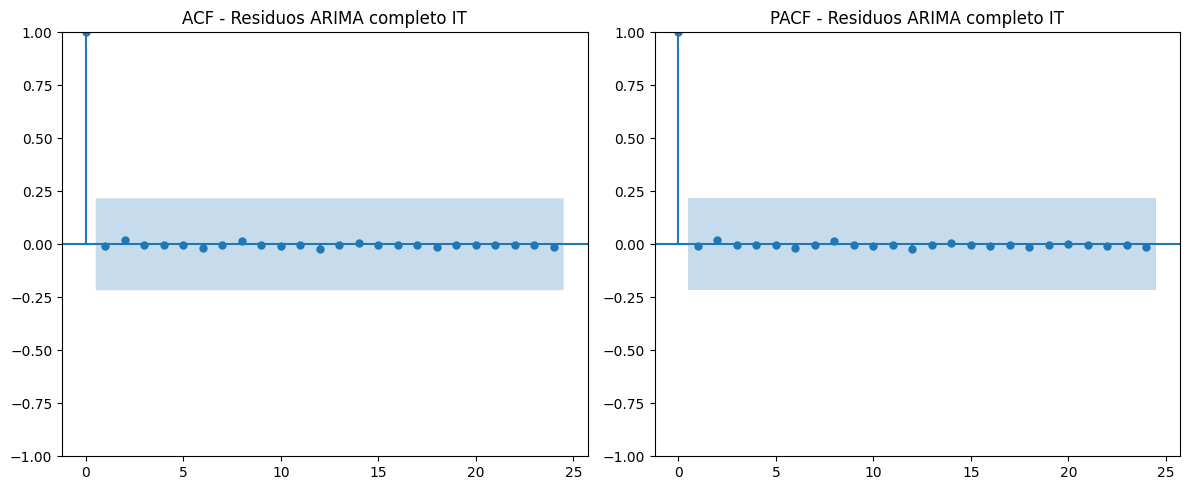

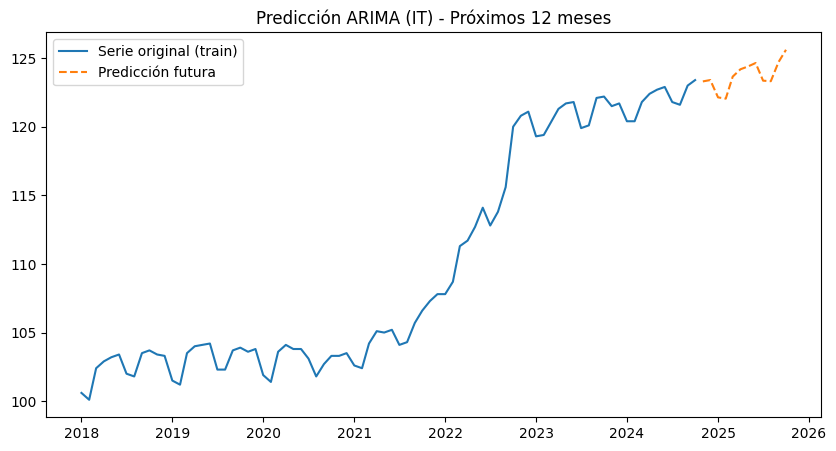


=== FR: Evaluando modelo ARIMA y predicción ===
Ljung-Box p-value (lag 24): 1.0000 → Ruido blanco


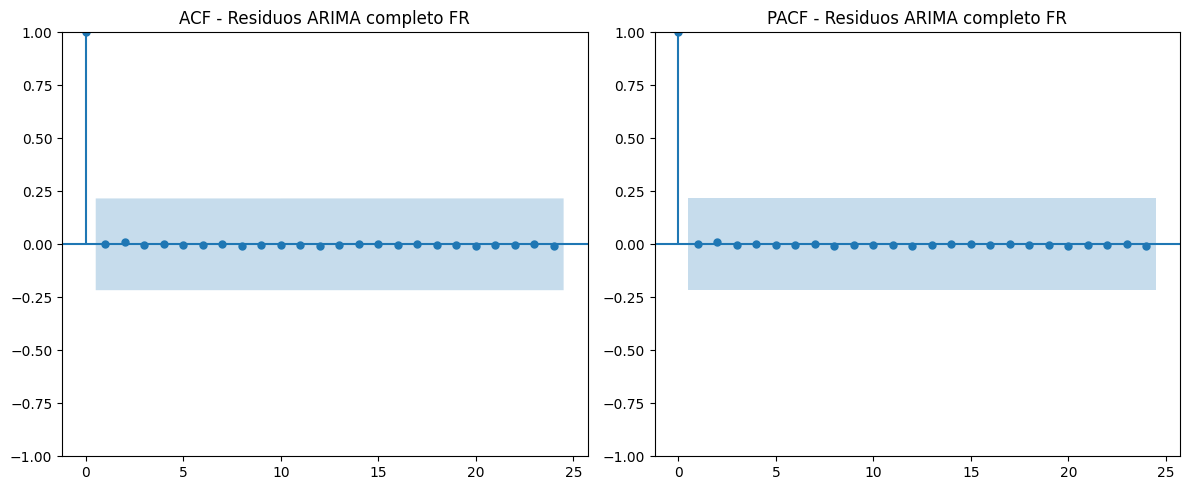

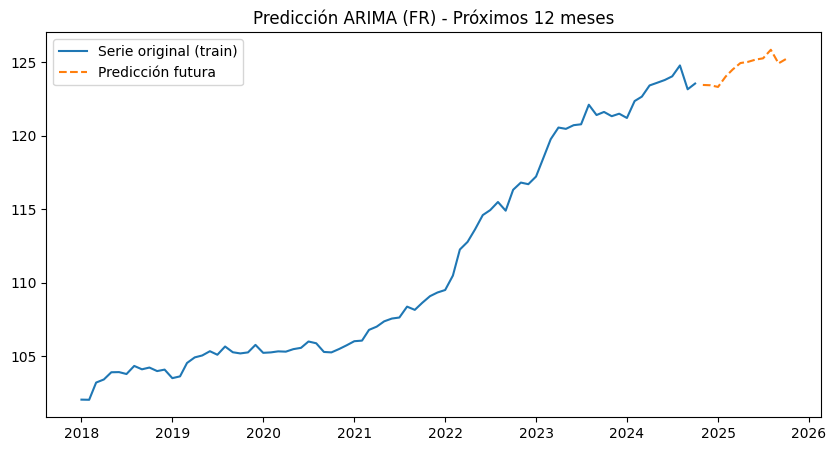


=== ES: Evaluando modelo ARIMA y predicción ===
Ljung-Box p-value (lag 24): 1.0000 → Ruido blanco


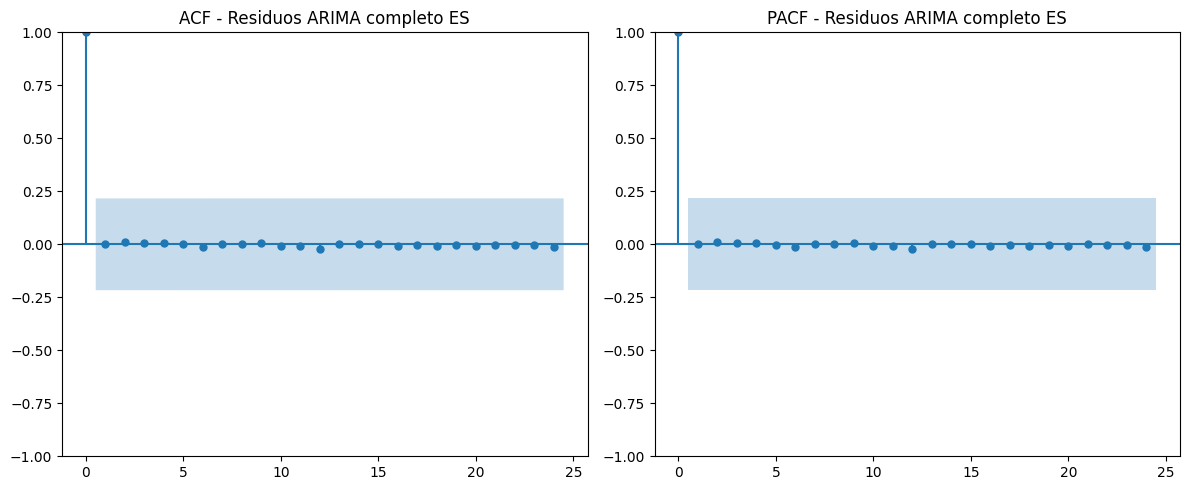

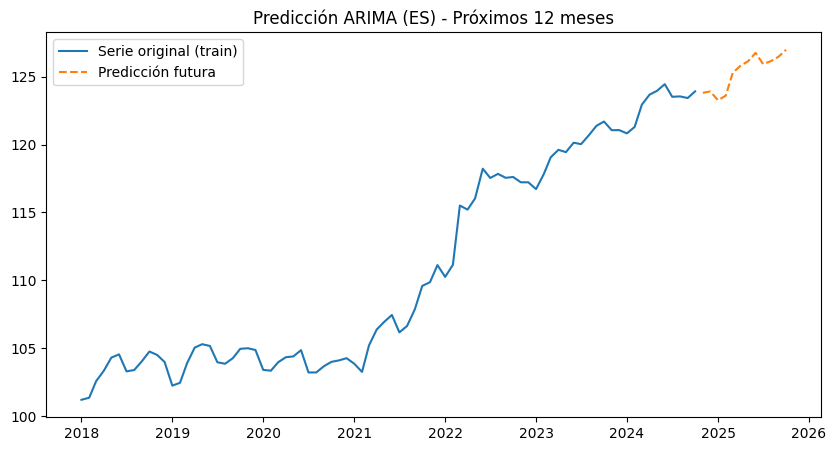


=== PL: Evaluando modelo ARIMA y predicción ===
Ljung-Box p-value (lag 24): 0.9533 → Ruido blanco


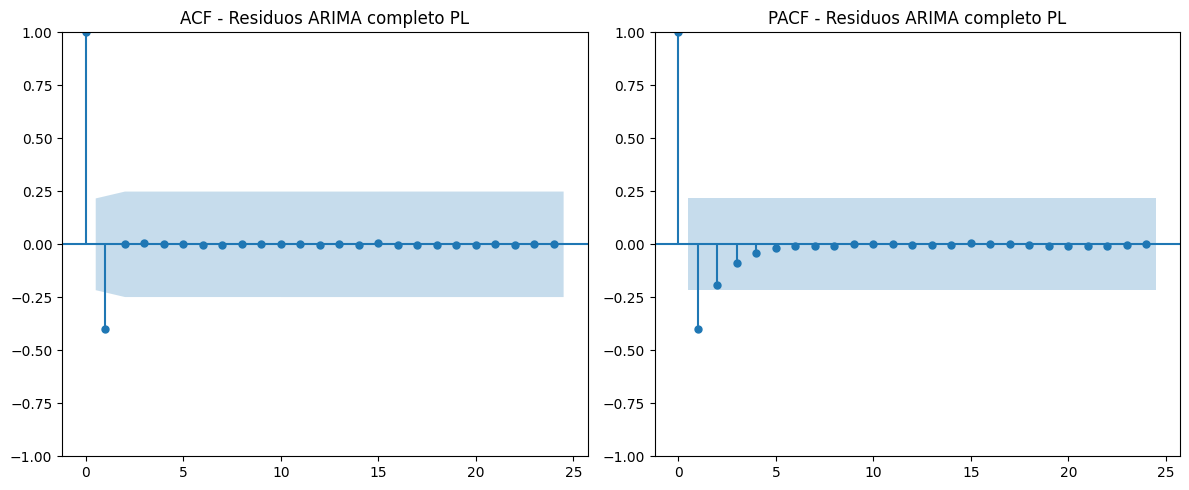

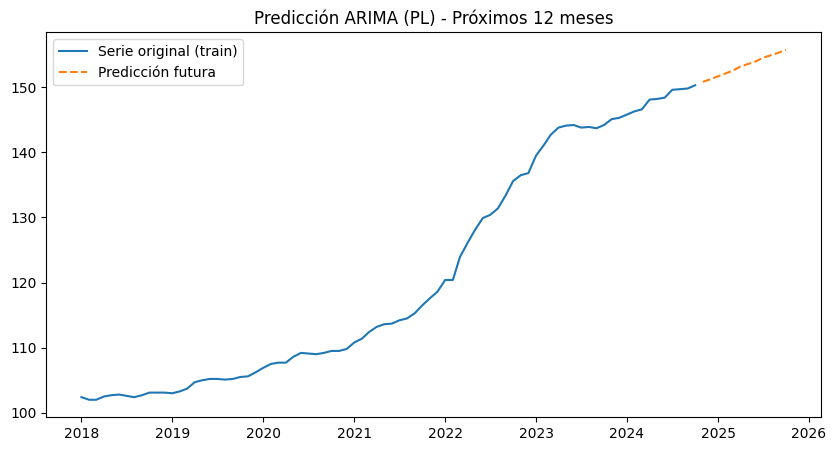


=== NL: Evaluando modelo ARIMA y predicción ===
Ljung-Box p-value (lag 24): 1.0000 → Ruido blanco


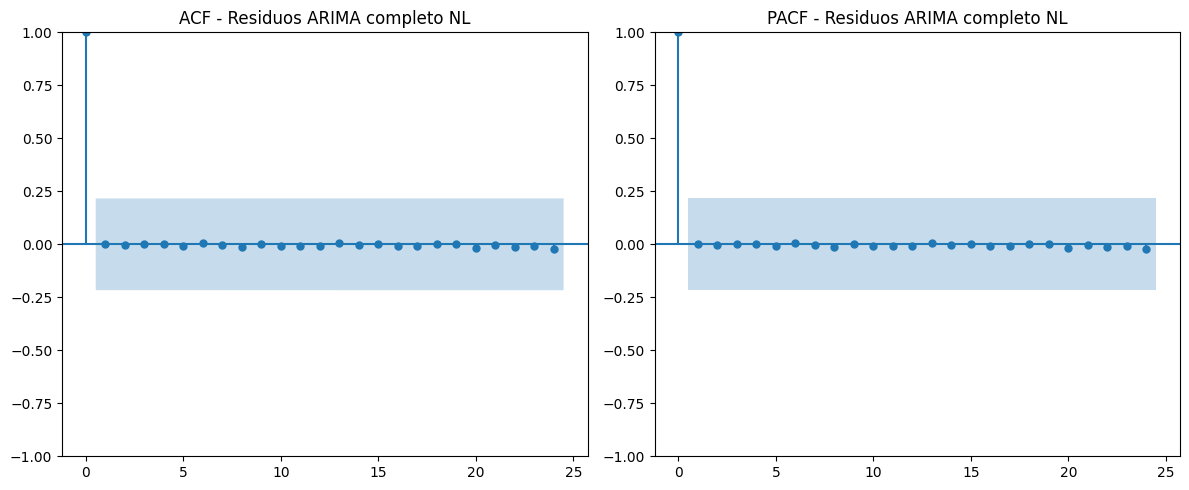

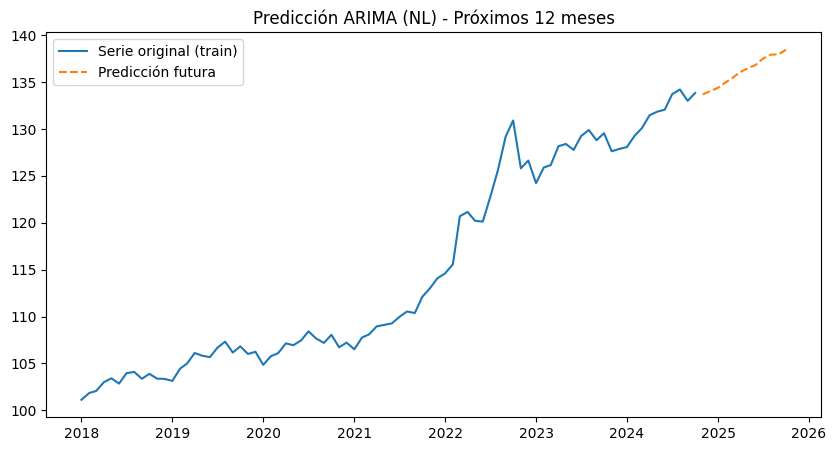


=== DE: Evaluando modelo ARIMA y predicción ===
Ljung-Box p-value (lag 24): 1.0000 → Ruido blanco


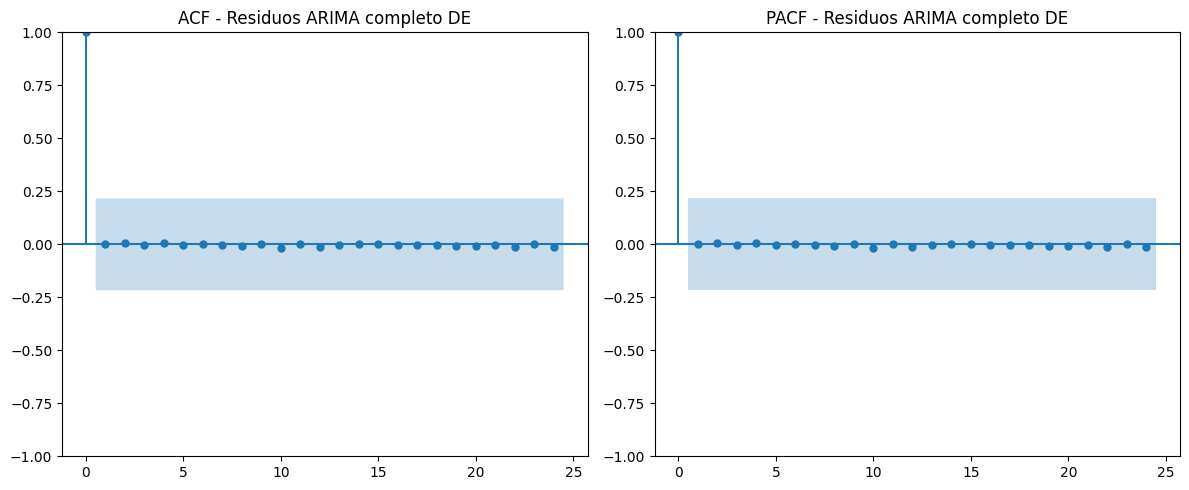

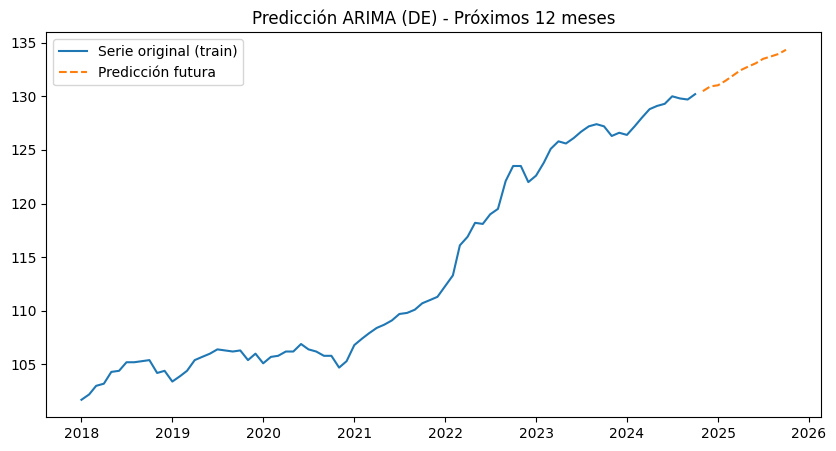

In [21]:
paises_sel
df_predecir=analizar_y_predecir_arima(paises_sel, pivot_multi)

In [22]:
df_predecir

BE          IT          FR          ES          PL  \
2024-11-01  132.737304  123.303344  123.443670  123.806317  150.821529   
2024-12-01  133.211515  123.403235  123.423668  123.901031  151.222788   
2025-01-01  132.608414  122.141140  123.309781  123.256244  151.675591   
2025-02-01  133.686008  122.046949  124.022791  123.596667  152.128394   
2025-03-01  134.036840  123.653864  124.496678  125.263244  152.546834   
2025-04-01  133.728135  124.187813  124.932481  125.797032  153.171452   
2025-05-01  134.013611  124.390585  125.011912  126.115348  153.555529   
2025-06-01  134.300125  124.645221  125.166898  126.741419  153.956787   
2025-07-01  134.055607  123.356923  125.253045  125.921748  154.529861   
2025-08-01  135.493719  123.319103  125.834036  126.129016  154.913938   
2025-09-01  135.390562  124.711659  124.910632  126.458509  155.298015   
2025-10-01  135.833769  125.609223  125.205633  126.969836  155.750818   

                    NL          DE  
2024-11-01  133.699642  130.481561  
2024-12-01  134.058665  130.922277  
2025-01-01  134.406005  131.029380  
2025-02-01  134.989343  131.464916  
2025-03-01  135.476881  131.920549  
2025-04-01  136.099941  132.427235  
2025-05-01  136.489341  132.759834  
2025-06-01  136.841354  133.073302  
2025-07-01  137.529840  133.492986  
2025-08-01  137.944942  133.712630  
2025-09-01  137.962820  133.947945  
2025-10-01  138.459703  134.338206

In [47]:
df_predecir.to_csv("1. HicpFuturo_Arima_TendenciaEstacionalidadRuido.csv")

Todos los puntos excepto el lag 0, que está en uno porque un valor está correlacionado consigo mismo, están dentro de la banda azul, lo que significa que no hay autocorrelación estadísticamente significativa en los residuos. Lo que indica que el modelo ha captado correctamente la dinámica temporal del HICP de cada páis exceptuando polonia que se le escapa uno

## PREDECIR TENDENCIA FUTURA DEL HICP SIN ESTACIONALIDAD NI RUIDO
AUTOARIMA SIN ESTACIONALIDAD SOBRE LA TENDENCIA: 

ARIMA sobre la tendencia,Modelos entrenados sobre la componente de tendencia solamente.

Tiene sentido para capturar patrones de largo plazo.

(Porque la tendencia ya ha sido separada de la estacionalidad y no debería contener estacionalidad)


In [23]:
#Guardar los modelos:
modelos_arima = {}  # aquí guardaremos los modelos por país

for pais in paises_sel: #Recorro una lista de paises
    print(f"\nEntrenando modelo ARIMA para: {pais}")

    serie = df_tendencias_pivot[pais].dropna() #esta serie contiene solo la tendencia
    train = serie[serie.index <= "2024-12-01"] #entreno el modelo hasta esa fecha

    modelo = auto_arima( 
        train,
        start_p=1, start_q=1,
        max_p=5, max_q=5,
        d=None,
        seasonal=False, #sin componente estacional
        trace=True,
        error_action='ignore',
        suppress_warnings=True,
        stepwise=True
    )

    modelos_arima[pais] = modelo  # guardo el modelo entrenado en dicc. modelos_arima

    print(f"Modelo guardado para {pais}: ARIMA{modelo.order}")


Entrenando modelo ARIMA para: BE
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-202.305, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-156.031, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-187.123, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-157.779, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-202.282, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-186.583, Time=0.06 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-201.555, Time=0.18 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec

Best model:  ARIMA(1,2,1)(0,0,0)[0] intercept
Total fit time: 1.020 seconds
Modelo guardado para BE: ARIMA(1, 2, 1)

Entrenando modelo ARIMA para: IT
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0]

In [49]:
def generar_df_pred_tendencia(modelos_arima, df_tendencias_pivot, n_periods=12):
    from pandas.tseries.offsets import DateOffset

    predicciones_tendencia = {}

    for pais, modelo in modelos_arima.items():
        try:
            last_date = df_tendencias_pivot[pais].dropna().index[-1]
            fechas_futuras = pd.date_range(start=last_date + DateOffset(months=1), periods=n_periods, freq="MS")
            pred = modelo.predict(n_periods=n_periods)
            predicciones_tendencia[pais] = pd.Series(pred, index=fechas_futuras)
        except Exception as e:
            print(f"Error en {pais}: {e}")

    df_pred_tendencia = pd.DataFrame(predicciones_tendencia)
    return df_pred_tendencia

# Ejecutar
df_pred_tendencia = generar_df_pred_tendencia(modelos_arima, df_tendencias_pivot, n_periods=12)




In [50]:
df_pred_tendencia

BE          IT          FR          ES          PL  \
2024-07-01  131.753458  122.331332  123.372410  123.471117  148.939454   
2024-08-01  132.228493  122.477992  123.546054  123.761805  149.400909   
2024-09-01  132.707829  122.627048  123.719695  124.055814  149.860955   
2024-10-01  133.191571  122.778131  123.893336  124.353143  150.320337   
2024-11-01  133.679728  122.930932  124.066976  124.653793  150.779408   
2024-12-01  134.172300  123.085186  124.240616  124.957763  151.238332   
2025-01-01  134.669287  123.240671  124.414257  125.265054  151.697188   
2025-02-01  135.170690  123.397199  124.587897  125.575666  152.156011   
2025-03-01  135.676507  123.554609  124.761537  125.889598  152.614819   
2025-04-01  136.186740  123.712766  124.935178  126.206851  153.073620   
2025-05-01  136.701388  123.871555  125.108818  126.527425  153.532417   
2025-06-01  137.220452  124.030881  125.282458  126.851319  153.991213   

                    NL          DE  
2024-07-01  132.132444  129.148939  
2024-08-01  132.551167  129.456206  
2024-09-01  132.962934  129.763472  
2024-10-01  133.369347  130.070738  
2024-11-01  133.771914  130.378004  
2024-12-01  134.171901  130.685271  
2025-01-01  134.569630  130.992537  
2025-02-01  134.965297  131.299803  
2025-03-01  135.358975  131.607069  
2025-04-01  135.750826  131.914335  
2025-05-01  136.141003  132.221602  
2025-06-01  136.529677  132.528868

In [54]:
df_pred_tendencia.to_csv("2_HicpFuturo_ArimaTendencia.csv")

## COMPARAR PREDICCIONES DE SOLO TENDENCIA VS TENDENCIA + ESTACIONALIDAD

Comparación HICP completo vs. tendencia,Gráficas comparando predicciones de la serie completa frente a la tendencia sola.

In [24]:
from pandas.tseries.offsets import DateOffset

def comparar_predicciones_tendencia_vs_completo(paises, pivot_multi, df_tendencias_pivot, modelos_arima, n_periods=3):
    for pais in paises:
        print(f"\n{pais} - Generando predicción comparada...")

        # 1. Predicción de tendencia:
        if pais not in modelos_arima:
            print(f"No hay modelo de tendencia para {pais}")
            continue

        try:
            modelo_trend = modelos_arima[pais]
            last_date_trend = df_tendencias_pivot[pais].dropna().index[-1]
            future_dates = [last_date_trend + DateOffset(months=i) for i in range(1, n_periods+1)]
            pred_trend = modelo_trend.predict(n_periods=n_periods)
        except Exception as e:
            print(f"Error en predicción de tendencia para {pais}: {e}")
            continue

        # 2. Predicción del HICP completo:
        try:
            serie_original = pivot_multi[pais].dropna()
            train_full = serie_original[serie_original.index <= "2024-10-01"]

            modelo_completo = auto_arima(
                train_full,
                start_p=1, start_q=1,
                max_p=5, max_q=5,
                d=None,
                seasonal=True,
                m=12,
                stepwise=True,
                suppress_warnings=True,
                error_action="ignore"
            )

            pred_full = modelo_completo.predict(n_periods=n_periods)
        except Exception as e:
            print(f"Error en modelo completo para {pais}: {e}")
            continue

    # 3. Graficas
        plt.figure(figsize=(12, 6))
        plt.plot(serie_original, label="HICP observado", linewidth=2)
        plt.plot(future_dates, pred_full, marker='o', label="Predicción HICP completo (seasonal=True)")
        plt.plot(future_dates, pred_trend, marker='s', label="Predicción solo tendencia (descompuesta)")
        plt.axvline(serie_original.index[-1], color="gray", linestyle="--", alpha=0.7)
        plt.title(f"{pais} - Comparación de predicciones HICP vs Tendencia")
        plt.xlabel("Fecha")
        plt.ylabel("HICP")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


BE - Generando predicción comparada...


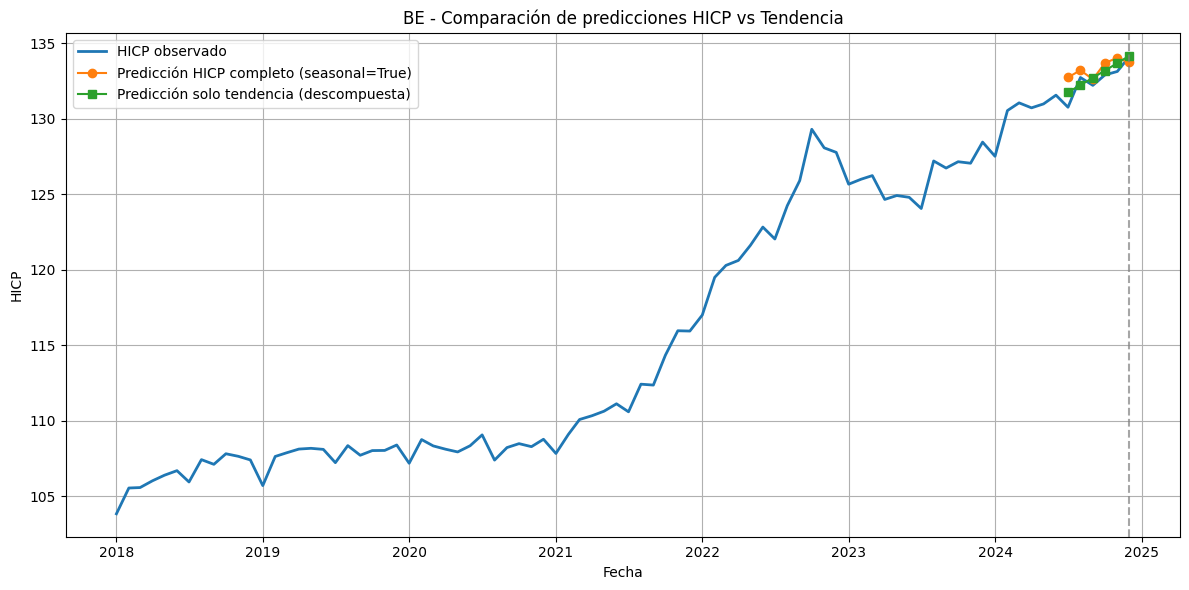


IT - Generando predicción comparada...


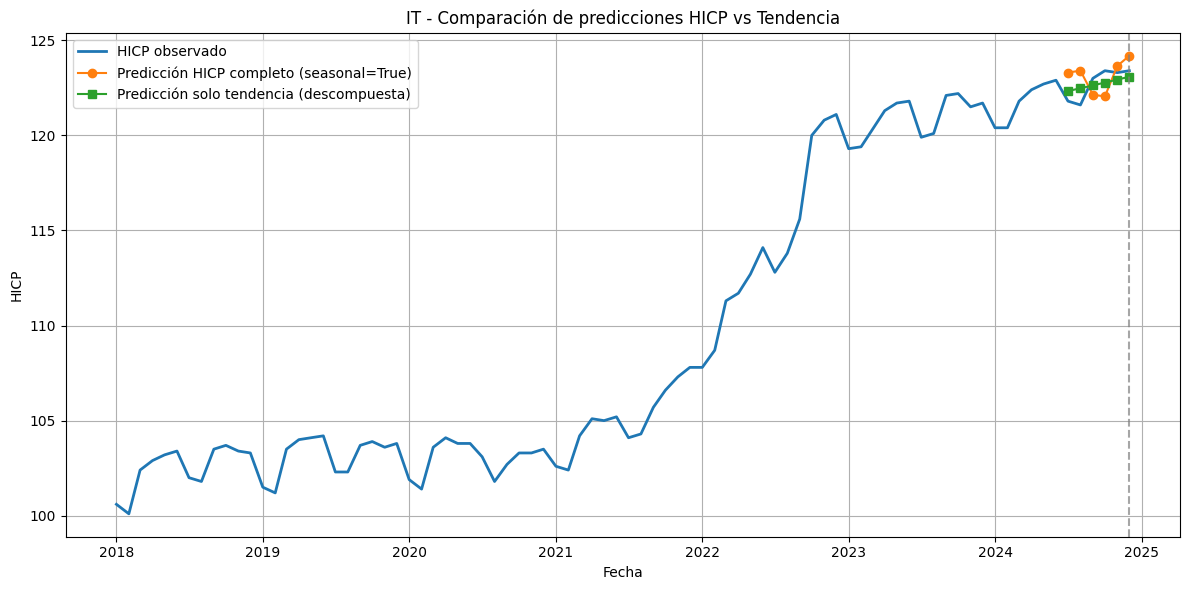


FR - Generando predicción comparada...


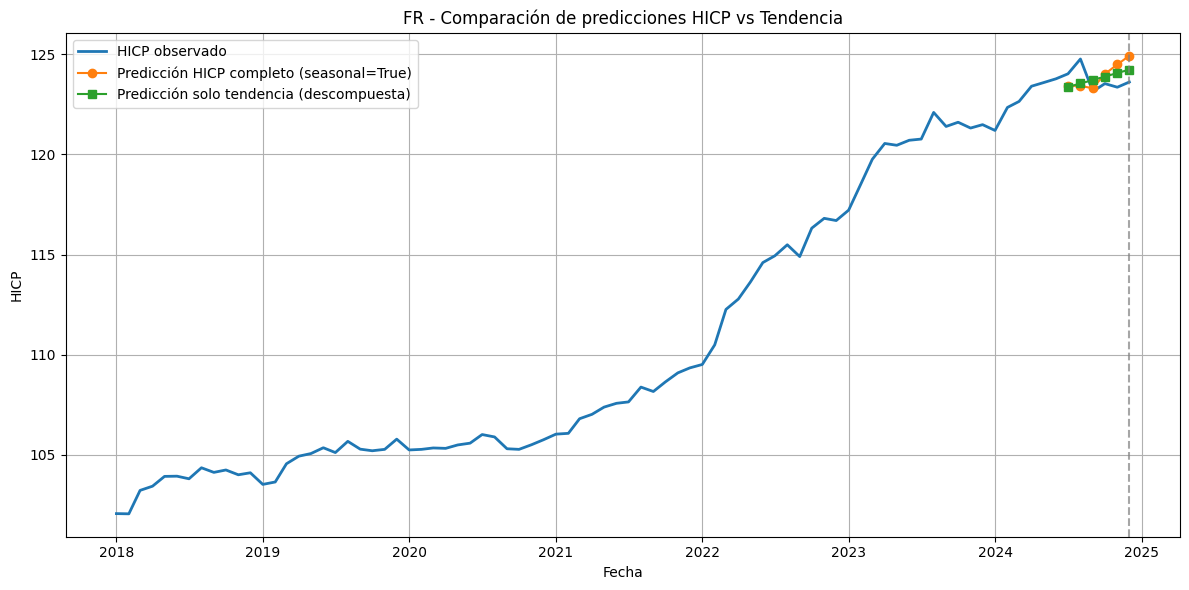


ES - Generando predicción comparada...


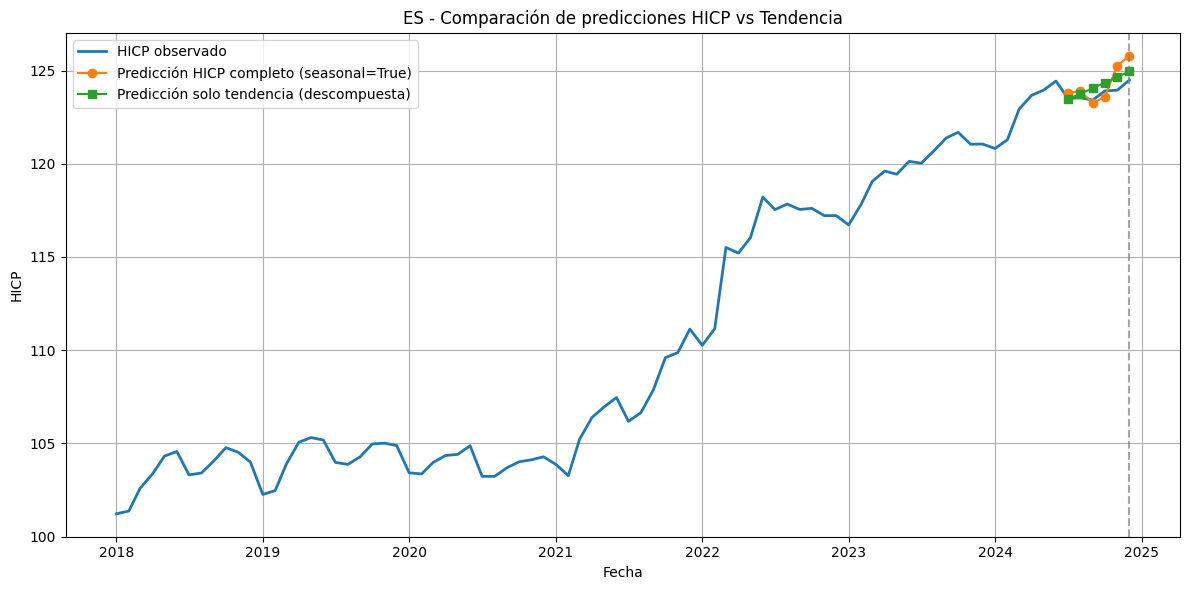


PL - Generando predicción comparada...


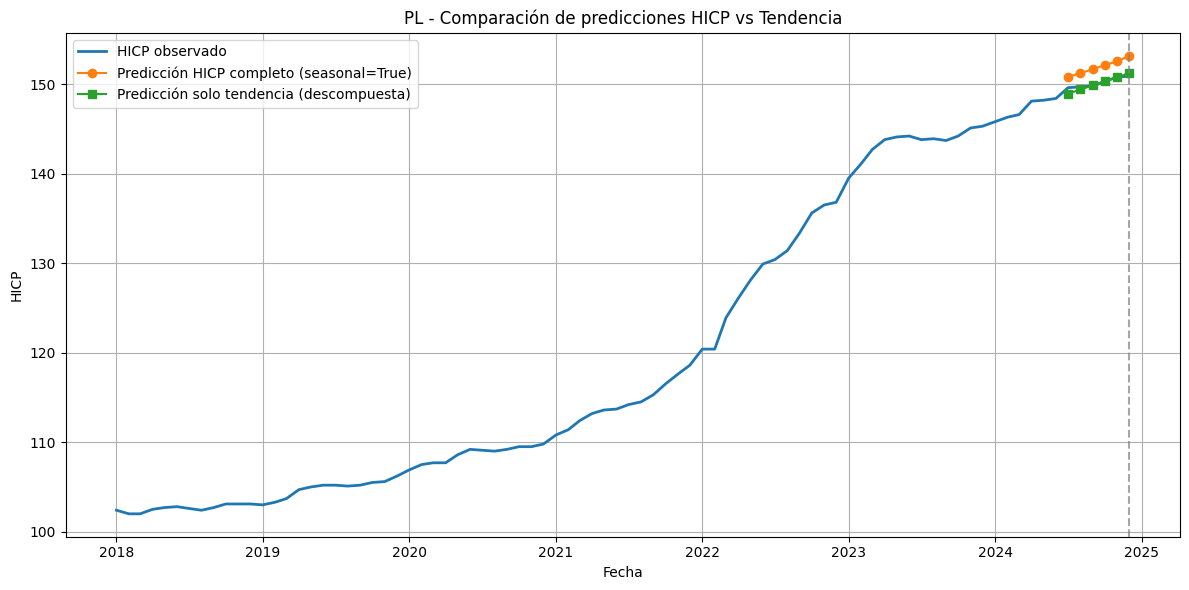


NL - Generando predicción comparada...


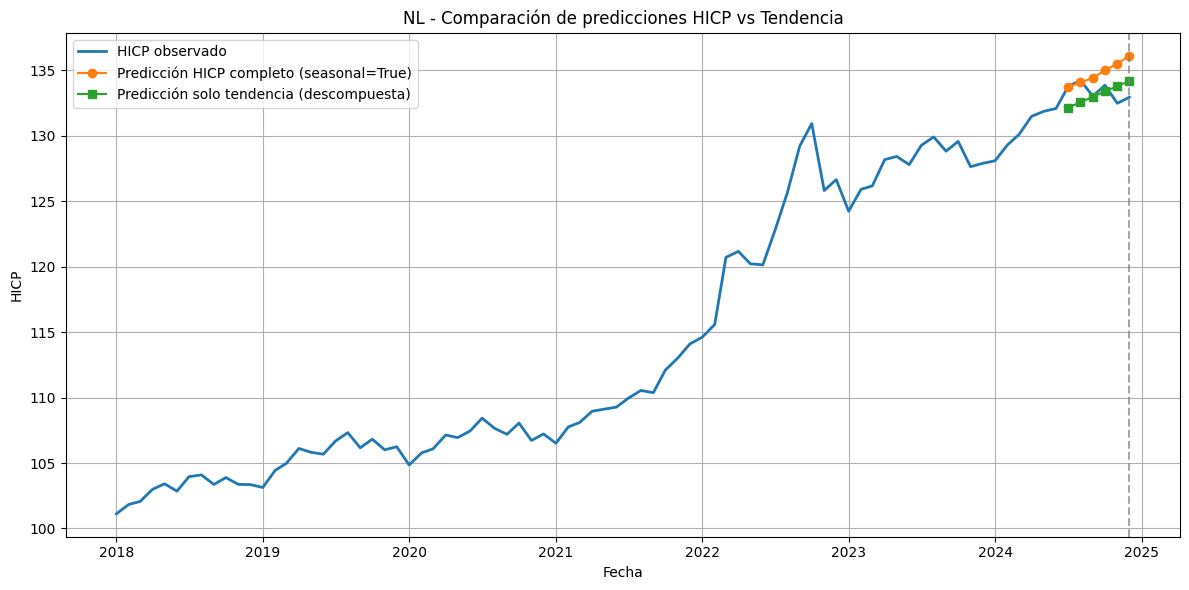


DE - Generando predicción comparada...


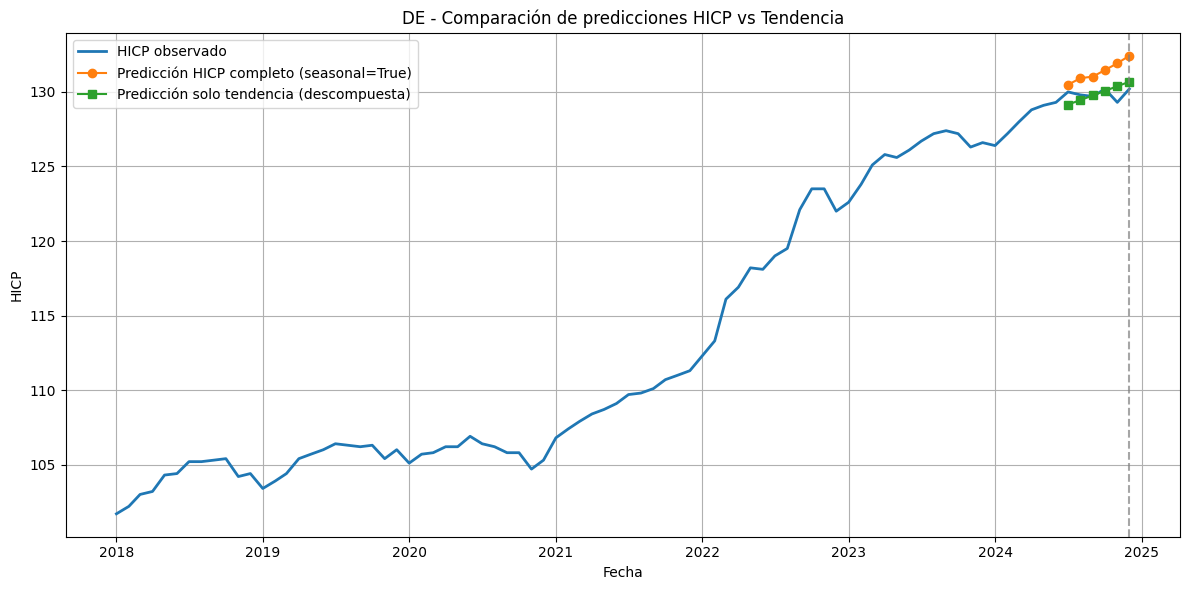

In [25]:
comparar_predicciones_tendencia_vs_completo(paises=paises_sel, pivot_multi=pivot_multi, df_tendencias_pivot=df_tendencias_pivot, modelos_arima=modelos_arima, n_periods=6) #meses

AUTOARIMA CON LOG-TRANSFORMATION
(transformo la serie antes de entrenar y el inverso (exp) para evaluar en escala original.)
Hace que la varianza sea más constante a lo largo del tiempo → condición deseable para los modelos ARIMA

ARIMA log-transformado,"Predicciones y métricas (RMSE, MAE) para ARIMA con log-transformación."

In [26]:
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

log_rmse_por_pais = {}
log_mae_por_pais = {}

for pais in paises_sel:
    print(f"\nEvaluando modelo ARIMA sobre log para: {pais}")

    serie = pivot_multi[pais].dropna()
    if (serie <= 0).any():
        print(f"{pais}: Contiene valores <= 0. Saltando.")
        continue

    log_serie = np.log(serie)

    train = log_serie[log_serie.index <= "2024-10-01"]
    test = log_serie[(log_serie.index > "2024-10-01") & (log_serie.index <= "2024-12-01")]

    if len(test) == 0:
        continue

    modelo_log = auto_arima(
        train,
        start_p=1, start_q=1,
        max_p=5, max_q=5,
        seasonal=True,
        m=12,
        stepwise=True,
        suppress_warnings=True,
        error_action="ignore"
    )

    pred_log = modelo_log.predict(n_periods=len(test))

    # Volver a la escala original (inverso de log)
    pred_test_exp = np.exp(pred_log)
    test_exp = np.exp(test)

    rmse_log = root_mean_squared_error(test_exp, pred_test_exp)
    mae_log = mean_absolute_error(test_exp, pred_test_exp)

    log_rmse_por_pais[pais] = rmse_log
    log_mae_por_pais[pais] = mae_log
    print(f"{pais} - RMSE log-transformado: {rmse_log:.4f} | MAE: {mae_log:.4f}")
    from sklearn.metrics import mean_absolute_error, root_mean_squared_error

log_rmse_por_pais = {}
log_mae_por_pais = {}

for pais in paises_sel:
    print(f"\nEvaluando modelo ARIMA sobre log para: {pais}")

    serie = pivot_multi[pais].dropna()
    if (serie <= 0).any():
        print(f"{pais}: Contiene valores <= 0. Saltando.")
        continue

    log_serie = np.log(serie)

    train = log_serie[log_serie.index <= "2024-10-01"]
    test = log_serie[(log_serie.index > "2024-10-01") & (log_serie.index <= "2024-12-01")]

    if len(test) == 0:
        continue

    modelo_log = auto_arima(
        train,
        start_p=1, start_q=1,
        max_p=5, max_q=5,
        seasonal=True,
        m=12,
        stepwise=True,
        suppress_warnings=True,
        error_action="ignore"
    )

    pred_log = modelo_log.predict(n_periods=len(test))

    # Volver a la escala original (inverso de log)
    pred_test_exp = np.exp(pred_log)
    test_exp = np.exp(test)

    rmse_log = root_mean_squared_error(test_exp, pred_test_exp)
    mae_log = mean_absolute_error(test_exp, pred_test_exp)

    log_rmse_por_pais[pais] = rmse_log
    log_mae_por_pais[pais] = mae_log
    print(f"{pais} - RMSE log-transformado: {rmse_log:.4f} | MAE: {mae_log:.4f}")


Evaluando modelo ARIMA sobre log para: BE
BE - RMSE log-transformado: 0.7057 | MAE: 0.6143

Evaluando modelo ARIMA sobre log para: IT
IT - RMSE log-transformado: 0.0474 | MAE: 0.0470

Evaluando modelo ARIMA sobre log para: FR
FR - RMSE log-transformado: 0.0432 | MAE: 0.0325

Evaluando modelo ARIMA sobre log para: ES
ES - RMSE log-transformado: 0.4416 | MAE: 0.3909

Evaluando modelo ARIMA sobre log para: PL
PL - RMSE log-transformado: 0.2926 | MAE: 0.2332

Evaluando modelo ARIMA sobre log para: NL
NL - RMSE log-transformado: 0.3644 | MAE: 0.3637

Evaluando modelo ARIMA sobre log para: DE
DE - RMSE log-transformado: 0.7534 | MAE: 0.7478

Evaluando modelo ARIMA sobre log para: BE
BE - RMSE log-transformado: 0.7057 | MAE: 0.6143

Evaluando modelo ARIMA sobre log para: IT
IT - RMSE log-transformado: 0.0474 | MAE: 0.0470

Evaluando modelo ARIMA sobre log para: FR
FR - RMSE log-transformado: 0.0432 | MAE: 0.0325

Evaluando modelo ARIMA sobre log para: ES
ES - RMSE log-transformado: 0.4416 | 

COMPARACIÓN DE MÉTRICAS

In [27]:
df_errores = pd.DataFrame({
    "RMSE": log_rmse_por_pais,
    "MAE": log_mae_por_pais
}).sort_values("RMSE", ascending=False)

print(df_errores)

        RMSE       MAE
DE  0.753450  0.747839
BE  0.705670  0.614273
ES  0.441630  0.390888
NL  0.364447  0.363670
PL  0.292613  0.233166
IT  0.047434  0.046967
FR  0.043166  0.032535


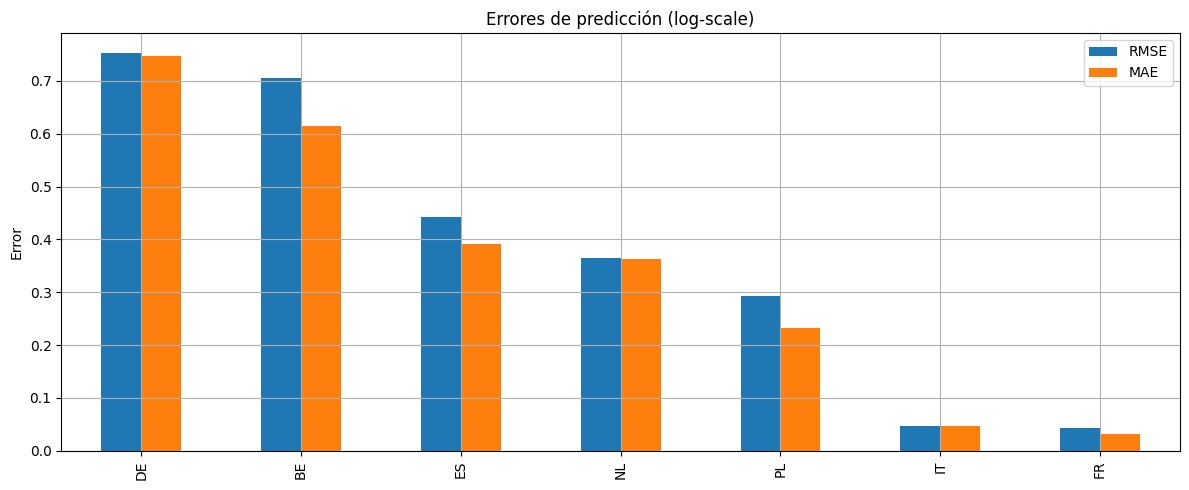

In [28]:
df_errores.plot(kind="bar", figsize=(12, 5), title="Errores de predicción (log-scale)")
plt.grid(True)
plt.ylabel("Error")
plt.tight_layout()
plt.show()

PREDICCIÓN FUTURA POR PAÍS

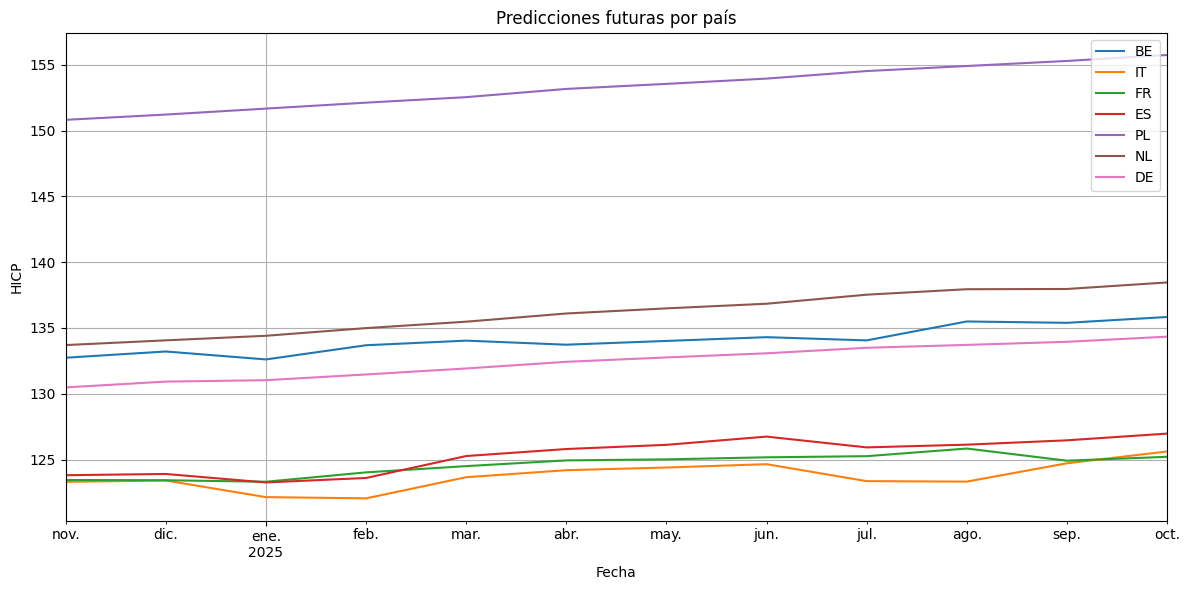

In [30]:
df_predecir.plot(figsize=(12, 6), title="Predicciones futuras por país")
plt.xlabel("Fecha")
plt.ylabel("HICP")
plt.grid(True)
plt.tight_layout()
plt.show()

## SARIMAX

SARIMAX - Validación y predicción futura,SARIMAX con datos de entrenamiento y predicción para 3 y 12 meses.

In [31]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def predecir_sarimax_por_pais(paises, pivot_multi, mostrar_graficos=True):
    predicciones_dict = {}
    errores = {}

    for pais in paises:
        print(f"\n=== {pais}: Entrenando modelo SARIMAX ===")
        try:
            serie = pivot_multi[pais].dropna()

            # División train/test
            train = serie[serie.index <= "2024-10-01"]
            test = serie[(serie.index > "2024-10-01") & (serie.index <= "2024-12-01")]

            if test.empty:
                print(f"{pais}: Test vacío. Saltando.")
                continue

            n_test = len(test)

            # Entrenamiento
            modelo = SARIMAX(
                train,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False)

            # Predicción
            forecast = modelo.get_forecast(steps=n_test)
            pred_media = forecast.predicted_mean
            pred_conf = forecast.conf_int()

            # Guardar predicción
            predicciones_dict[pais] = pred_media

            # Calcular errores
            rmse = root_mean_squared_error(test, pred_media)
            mae = mean_absolute_error(test, pred_media)
            errores[pais] = {"RMSE": rmse, "MAE": mae}

            # Gráfico
            if mostrar_graficos:
                plt.figure(figsize=(10,5))
                plt.plot(train, label="Train")
                plt.plot(test, label="Test", color="gray")
                plt.plot(pred_media, label="Predicción SARIMAX", linestyle="--")
                plt.fill_between(pred_conf.index, pred_conf.iloc[:,0], pred_conf.iloc[:,1], color='lightblue', alpha=0.5)
                plt.title(f"SARIMAX - Predicción HICP ({pais})")
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"Error en {pais}: {e}")

    # Crear DataFrame de predicciones y errores
    df_preds = pd.DataFrame(predicciones_dict)
    df_errores = pd.DataFrame(errores).T  # Transponemos para que países sean índices

    return df_preds, df_errores


=== BE: Entrenando modelo SARIMAX ===


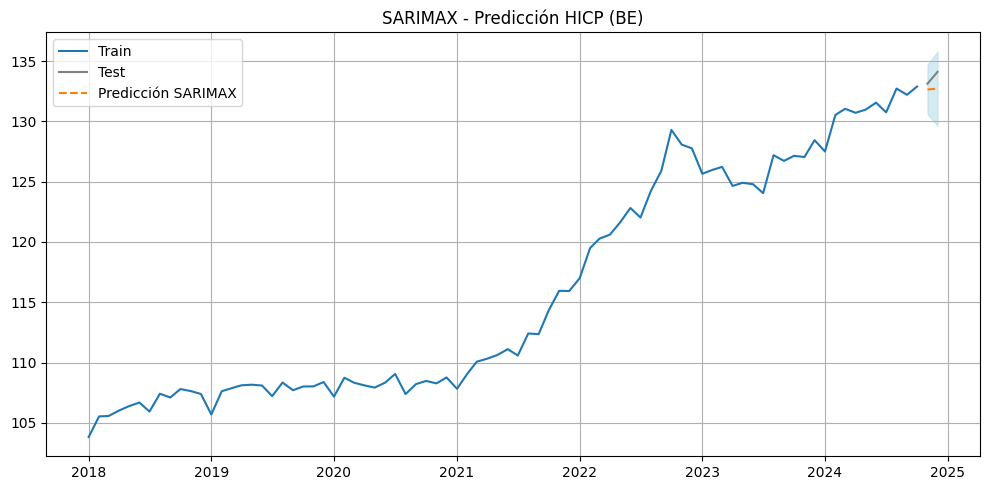


=== IT: Entrenando modelo SARIMAX ===


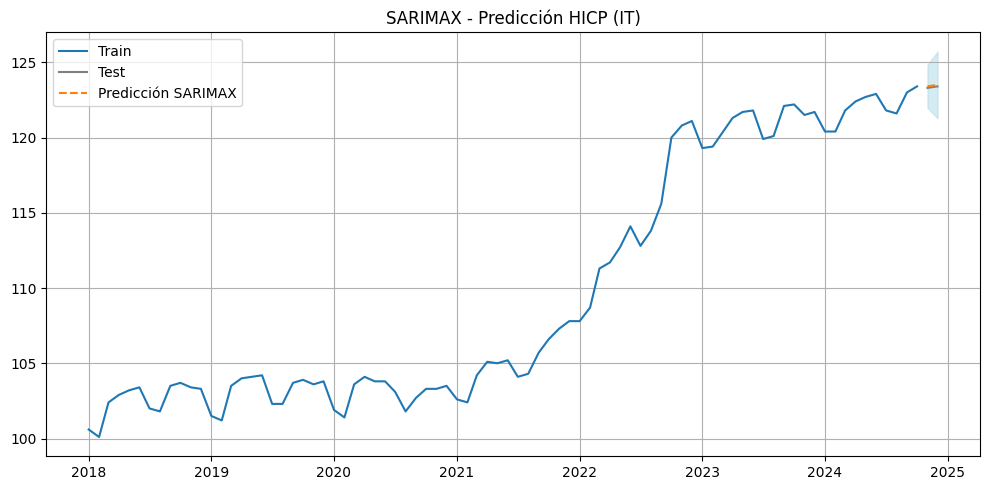


=== FR: Entrenando modelo SARIMAX ===


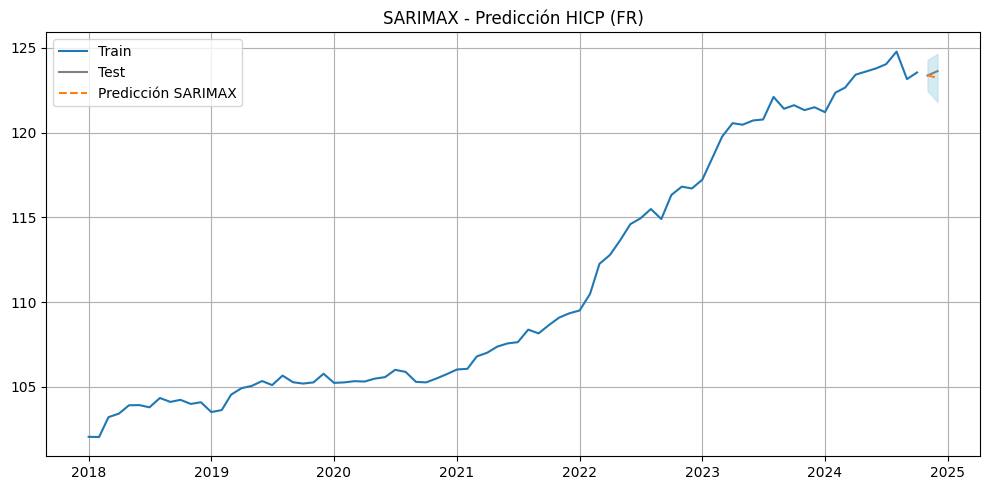


=== ES: Entrenando modelo SARIMAX ===


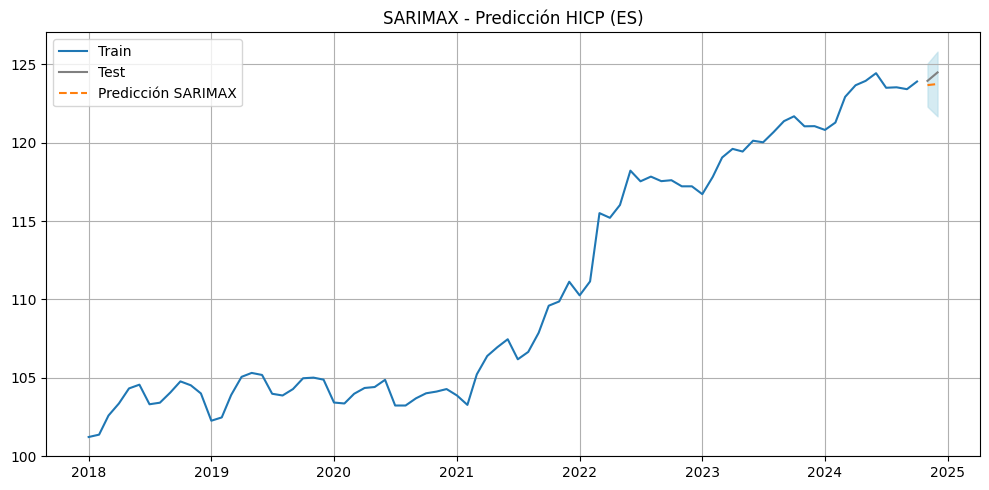


=== PL: Entrenando modelo SARIMAX ===


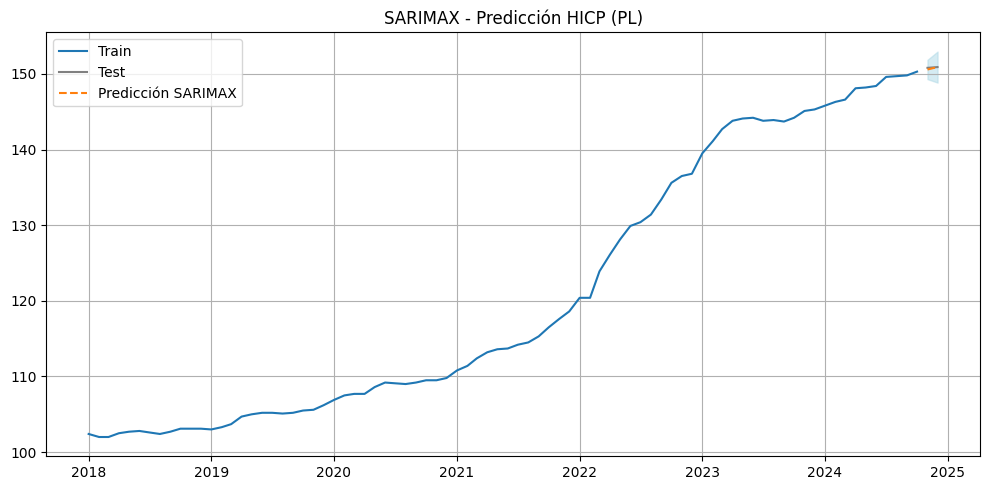


=== NL: Entrenando modelo SARIMAX ===


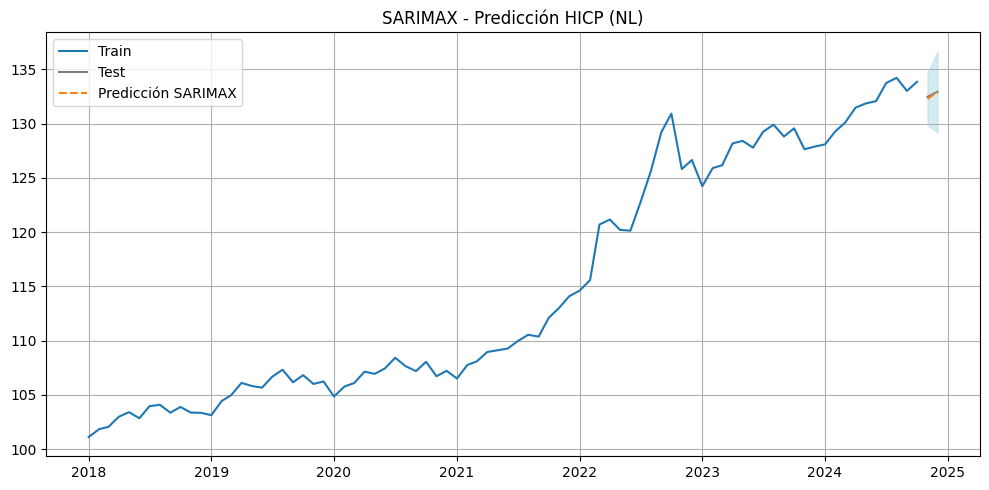


=== DE: Entrenando modelo SARIMAX ===


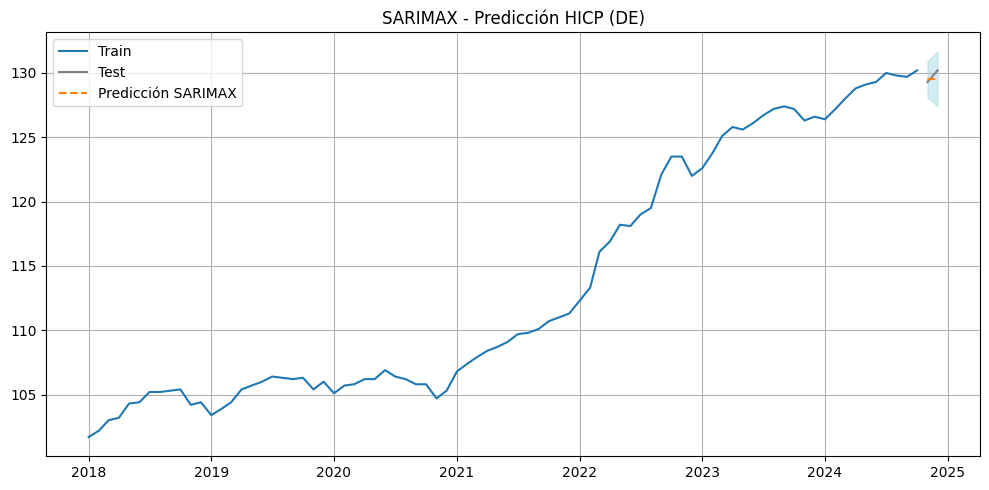

In [33]:
paises_sel
df_preds_sarimax, df_errores_sarimax = predecir_sarimax_por_pais(paises_sel, pivot_multi)

In [34]:
df_preds_sarimax
df_errores_sarimax


RMSE       MAE
BE  1.043426  0.936546
IT  0.102104  0.102055
FR  0.284738  0.207337
ES  0.556817  0.505029
PL  0.153731  0.109923
NL  0.137837  0.106913
DE  0.489686  0.435029

## PREDECIR SARIMAX A FUTURO

In [35]:
def predecir_sarimax_futuro(paises, pivot_multi, n_periodos=12, mostrar_graficos=True):
    predicciones_dict = {}

    for pais in paises:
        print(f"\n=== {pais}: Predicción SARIMAX futura ===")
        try:
            serie = pivot_multi[pais].dropna()
            train = serie[serie.index <= "2024-12-01"]

            # Entrenar modelo
            modelo = SARIMAX(
                train,
                order=(1,1,1),
                seasonal_order=(1,1,1,12),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit(disp=False)

            # Predicción futura
            forecast = modelo.get_forecast(steps=n_periodos)
            pred_media = forecast.predicted_mean
            pred_conf = forecast.conf_int()

            # Crear fechas futuras
            fecha_inicio = train.index[-1] + pd.DateOffset(months=1)
            fechas_futuras = pd.date_range(start=fecha_inicio, periods=n_periodos, freq="MS")

            # Guardar predicción
            predicciones_dict[pais] = pd.Series(pred_media.values, index=fechas_futuras)

            # Gráfico
            if mostrar_graficos:
                plt.figure(figsize=(10, 5))
                plt.plot(train, label="Train")
                plt.plot(fechas_futuras, pred_media, label="Predicción futura", linestyle="--")
                plt.fill_between(fechas_futuras, pred_conf.iloc[:, 0], pred_conf.iloc[:, 1], alpha=0.3, color='lightblue')
                plt.title(f"SARIMAX - Predicción futura ({pais})")
                plt.xlabel("Fecha")
                plt.ylabel("HICP")
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"Error en {pais}: {e}")

    # Combinar todas las predicciones en un DataFrame
    df_preds_futuro = pd.DataFrame(predicciones_dict)
    return df_preds_futuro


=== BE: Predicción SARIMAX futura ===


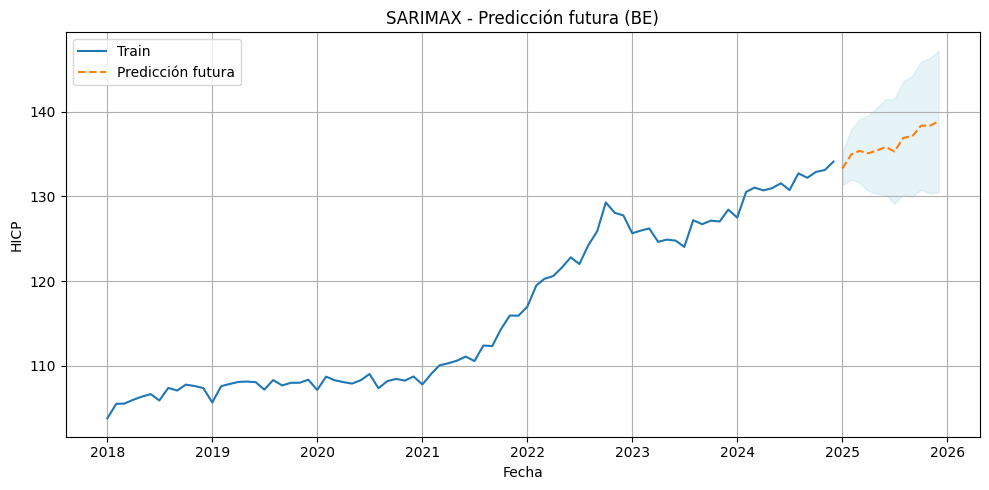


=== IT: Predicción SARIMAX futura ===


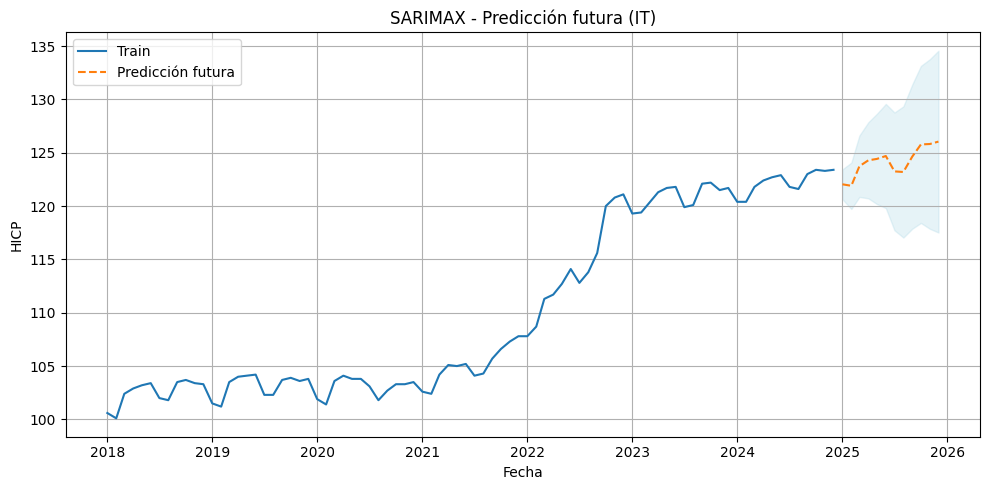


=== FR: Predicción SARIMAX futura ===


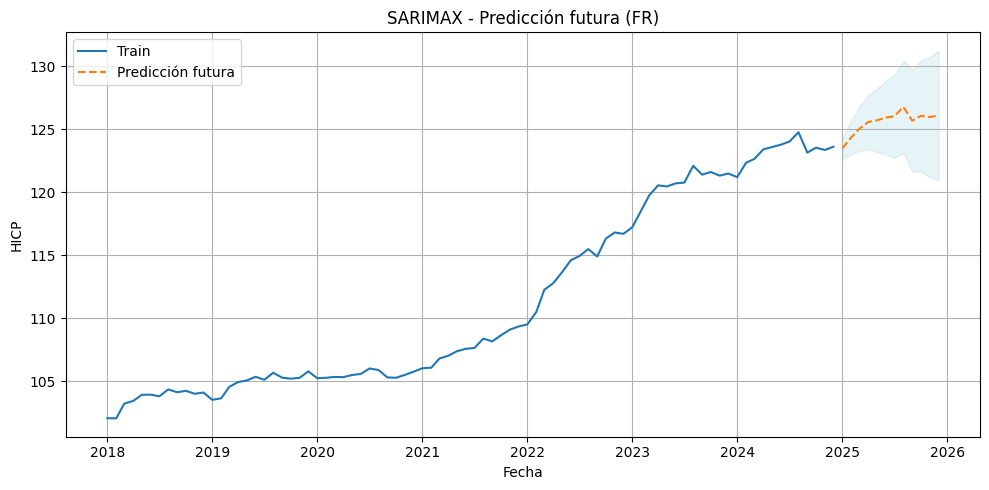


=== ES: Predicción SARIMAX futura ===


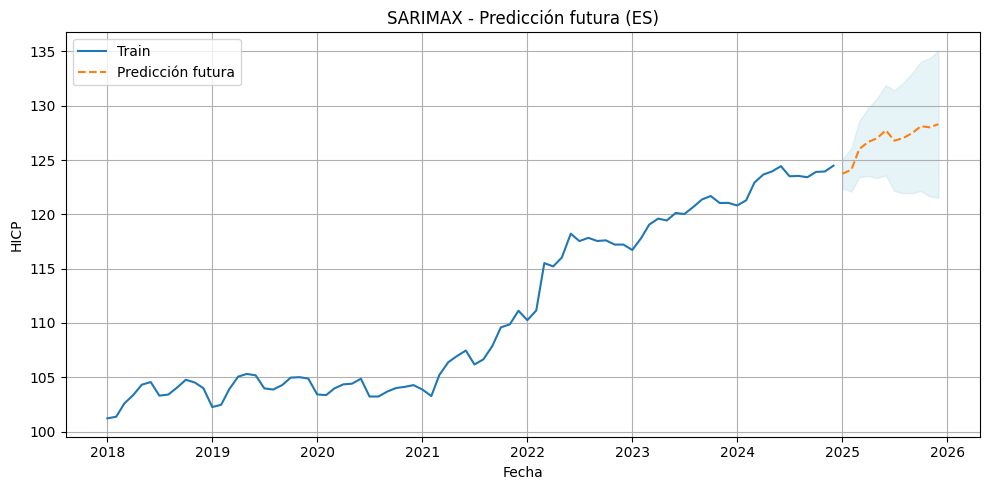


=== PL: Predicción SARIMAX futura ===


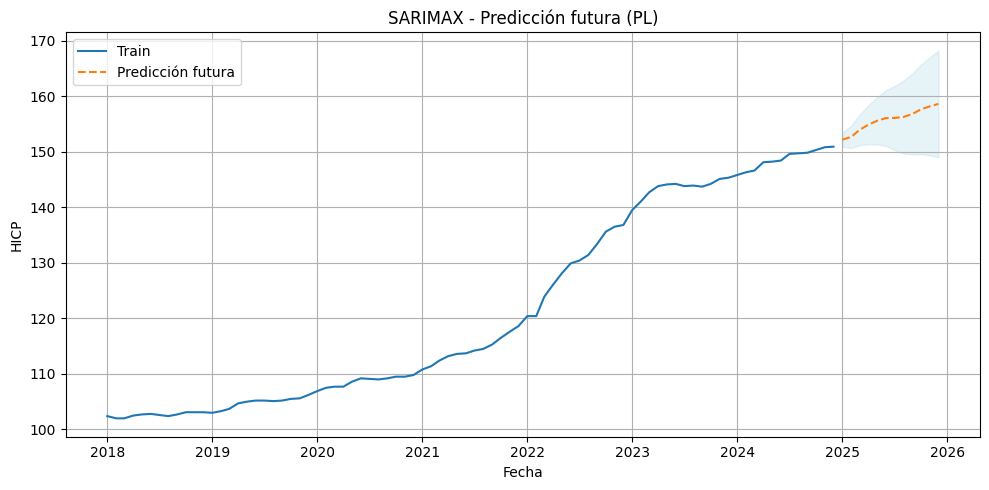


=== NL: Predicción SARIMAX futura ===


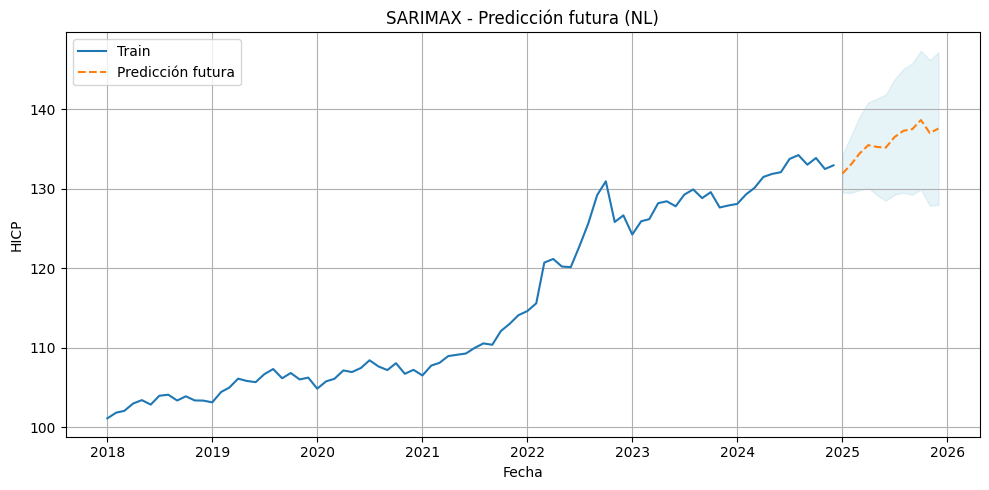


=== DE: Predicción SARIMAX futura ===


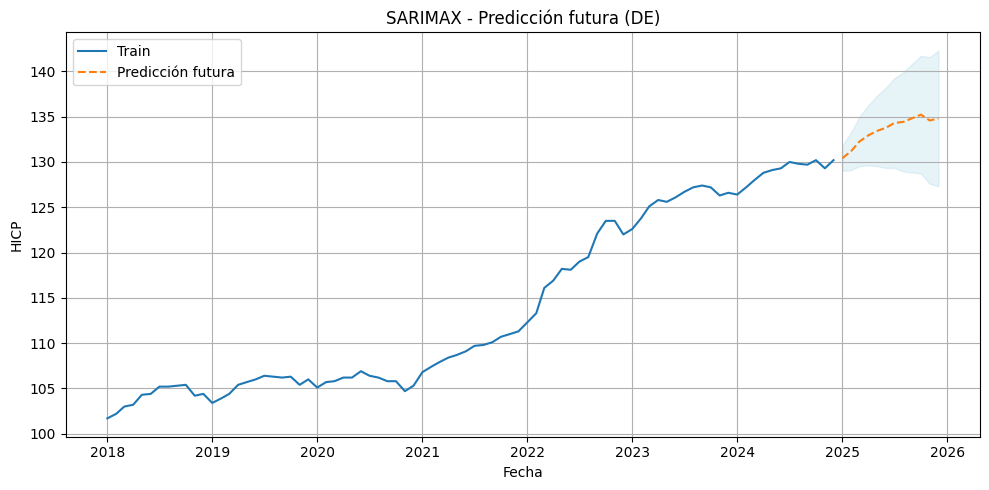

In [36]:
paises_sel
df_futuro_sarimax = predecir_sarimax_futuro(paises_sel, pivot_multi, n_periodos=12)

In [37]:
df_futuro_sarimax

BE          IT          FR          ES          PL  \
2025-01-01  133.308258  122.042288  123.495534  123.742360  152.157595   
2025-02-01  134.957723  121.902805  124.362990  124.108918  152.669689   
2025-03-01  135.376293  123.736420  125.043244  126.030706  153.909581   
2025-04-01  135.101315  124.289360  125.579569  126.669889  154.839751   
2025-05-01  135.427205  124.423799  125.712081  127.006229  155.547803   
2025-06-01  135.837147  124.694599  125.933708  127.742616  156.039837   
2025-07-01  135.314997  123.252853  126.042017  126.784663  156.062144   
2025-08-01  136.924274  123.197097  126.779716  127.038703  156.240006   
2025-09-01  137.100663  124.641819  125.678922  127.492802  156.770605   
2025-10-01  138.350332  125.779618  126.071889  128.114992  157.616943   
2025-11-01  138.352114  125.819497  125.970707  128.018431  158.159557   
2025-12-01  138.841300  126.045458  126.103985  128.306893  158.592231   

                    NL          DE  
2025-01-01  131.887107  130.411021  
2025-02-01  133.087589  131.219356  
2025-03-01  134.395972  132.250651  
2025-04-01  135.469699  132.933729  
2025-05-01  135.242224  133.422474  
2025-06-01  135.163371  133.766070  
2025-07-01  136.477898  134.304612  
2025-08-01  137.274428  134.426976  
2025-09-01  137.480210  134.833118  
2025-10-01  138.622553  135.222354  
2025-11-01  136.995656  134.581254  
2025-12-01  137.556477  134.807861

In [56]:
df_preds_sarimax.to_csv("3_HicpFuturo_Sarimax.csv")

In [37]:
## XGBoost

## XGBoost

XGBoost - Predicción y validación,Modelos XGBoost por país con lags y variables temporales.

In [38]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

def xgboost_pred_por_pais(paises, pivot_multi, n_lags=4):
    predicciones_dict = {}
    errores_dict = {}

    for pais in paises:
        print(f"\n=== {pais}: Entrenando modelo XGBoost ===")
        try:
            serie = pivot_multi[pais].dropna().copy()
            df = pd.DataFrame({"hicp": serie})
            df["mes"] = df.index.month
            df["año"] = df.index.year

            # Crear lags
            for lag in range(1, n_lags + 1):
                df[f"lag_{lag}"] = df["hicp"].shift(lag)

            df = df.dropna()

            # Separar train/test
            train = df[df.index <= "2024-10-01"]
            test = df[(df.index > "2024-10-01") & (df.index <= "2024-12-01")]

            X_train = train.drop(columns="hicp")
            y_train = train["hicp"]
            X_test = test.drop(columns="hicp")
            y_test = test["hicp"]

            if X_test.empty:
                print(f"{pais}: Test vacío. Saltando.")
                continue

            # Entrenar XGBoost
            modelo = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
            modelo.fit(X_train, y_train)

            # Predicción
            y_pred = modelo.predict(X_test)

            # Guardar predicción
            predicciones_dict[pais] = pd.Series(y_pred, index=X_test.index)

            # Calcular errores
            rmse = np.sqrt(mean_squared_error(y_test, y_pred))
            mae = mean_absolute_error(y_test, y_pred)
            errores_dict[pais] = {"RMSE": rmse, "MAE": mae}

            print(f"{pais} - RMSE: {rmse:.4f} | MAE: {mae:.4f}")

        except Exception as e:
            print(f"Error en {pais}: {e}")

    # DataFrames finales
    df_preds = pd.DataFrame(predicciones_dict)
    df_errores = pd.DataFrame(errores_dict).T

    return df_preds, df_errores

In [39]:
paises_sel
df_preds_xgb, df_errores_xgb = xgboost_pred_por_pais(paises_sel, pivot_multi)


=== BE: Entrenando modelo XGBoost ===
BE - RMSE: 1.1381 | MAE: 1.0560

=== IT: Entrenando modelo XGBoost ===
IT - RMSE: 1.4266 | MAE: 1.4264

=== FR: Entrenando modelo XGBoost ===
FR - RMSE: 0.1778 | MAE: 0.1325

=== ES: Entrenando modelo XGBoost ===
ES - RMSE: 1.0490 | MAE: 1.0293

=== PL: Entrenando modelo XGBoost ===
PL - RMSE: 0.6275 | MAE: 0.6255

=== NL: Entrenando modelo XGBoost ===
NL - RMSE: 1.5586 | MAE: 1.5294

=== DE: Entrenando modelo XGBoost ===
DE - RMSE: 0.6866 | MAE: 0.5545


In [40]:
df_preds_xgb
df_errores_xgb

RMSE       MAE
BE  1.138077  1.056038
IT  1.426580  1.426363
FR  0.177803  0.132502
ES  1.048970  1.029326
PL  0.627462  0.625467
NL  1.558583  1.529430
DE  0.686628  0.554482

## PREDECIR FUTURO XGBoost

XGBoost - Predicción futura,Predicción de los próximos 12 meses con XGBoost autoregresivo.

In [41]:
def xgboost_pred_futuro_por_pais(paises, pivot_multi, n_lags=2, n_periodos=12, mostrar_graficos=True):

    predicciones_dict = {}

    for pais in paises:
        print(f"\n=== {pais}: Predicción futura con XGBoost ===")
        try:
            serie = pivot_multi[pais].dropna().copy()
            df = pd.DataFrame({"hicp": serie})
            df["mes"] = df.index.month
            df["año"] = df.index.year

            # Crear lags
            for lag in range(1, n_lags + 1):
                df[f"lag_{lag}"] = df["hicp"].shift(lag)

            df = df.dropna()
            train = df[df.index <= "2024-12-01"]
            X_train = train.drop(columns="hicp")
            y_train = train["hicp"]

            modelo = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
            modelo.fit(X_train, y_train)

            # Preparar predicción futura
            ultimos_valores = train.iloc[-n_lags:].copy()
            fecha_inicio = train.index[-1] + DateOffset(months=1)

            pred_futuro = []
            fechas_futuras = []

            for i in range(n_periodos):
                nueva_fecha = fecha_inicio + DateOffset(months=i)
                año = nueva_fecha.year
                mes = nueva_fecha.month

                # Crear input con lags
                lags = pred_futuro[-n_lags:] if len(pred_futuro) >= n_lags else ultimos_valores["hicp"].tolist()[-n_lags+i:]
                while len(lags) < n_lags:
                    lags.insert(0, ultimos_valores["hicp"].iloc[-(n_lags - len(lags))])  # rellenar con últimos reales

                x_input = pd.DataFrame({
                    "año": [año],
                    "mes": [mes],
                    **{f"lag_{j+1}": [lags[-(j+1)]] for j in range(n_lags)}
                })
                #Ordeno las columnas porque si no da error todo el tiempo:

                x_input= x_input[X_train.columns]

                # Predecir
                y_pred = modelo.predict(x_input)[0]
                pred_futuro.append(y_pred)
                fechas_futuras.append(nueva_fecha)

            predicciones_dict[pais] = pd.Series(pred_futuro, index=fechas_futuras)

            if mostrar_graficos:
                plt.figure(figsize=(10, 5))
                plt.plot(serie, label="Serie histórica")
                plt.plot(fechas_futuras, pred_futuro, label="Predicción XGBoost", linestyle="--")
                plt.title(f"{pais} - Predicción futura con XGBoost")
                plt.xlabel("Fecha")
                plt.ylabel("HICP")
                plt.legend()
                plt.grid(True)
                plt.tight_layout()
                plt.show()

        except Exception as e:
            print(f"Error en {pais}: {e}")

    df_preds_futuro = pd.DataFrame(predicciones_dict)
    return df_preds_futuro


=== BE: Predicción futura con XGBoost ===


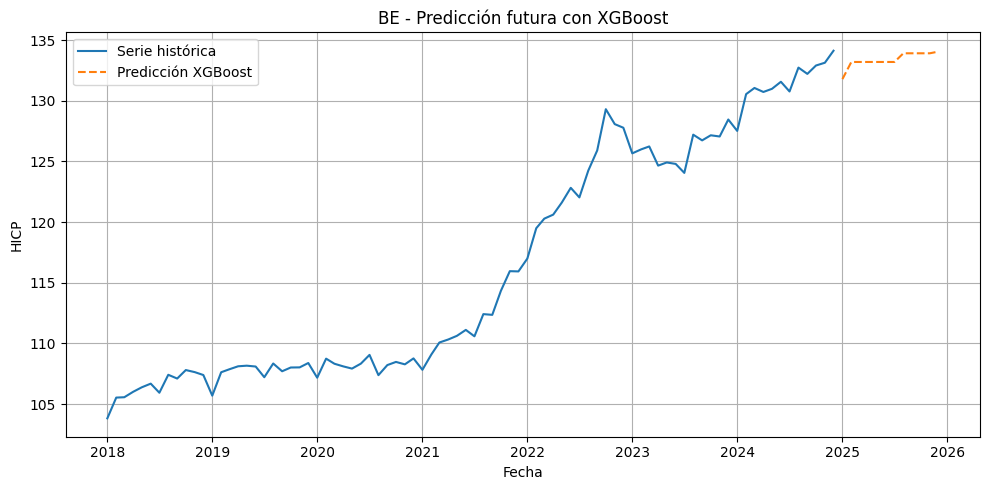


=== IT: Predicción futura con XGBoost ===


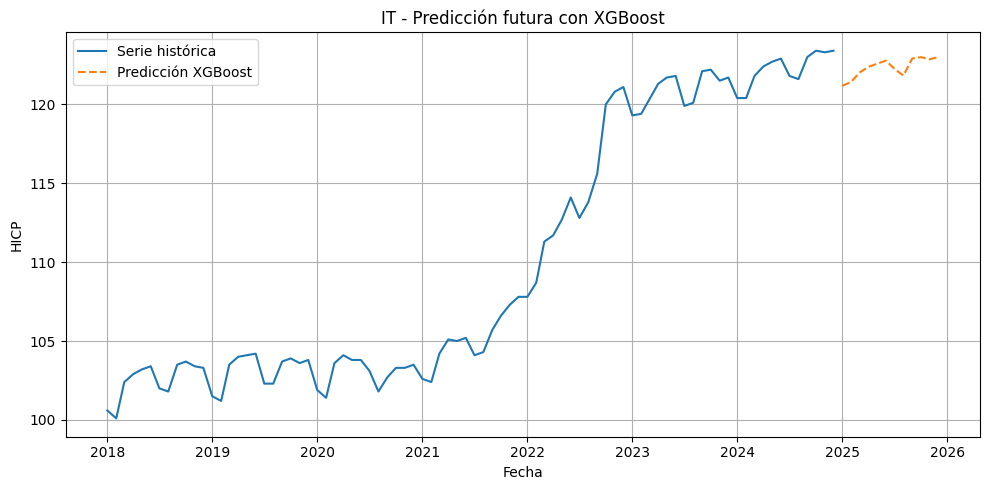


=== FR: Predicción futura con XGBoost ===


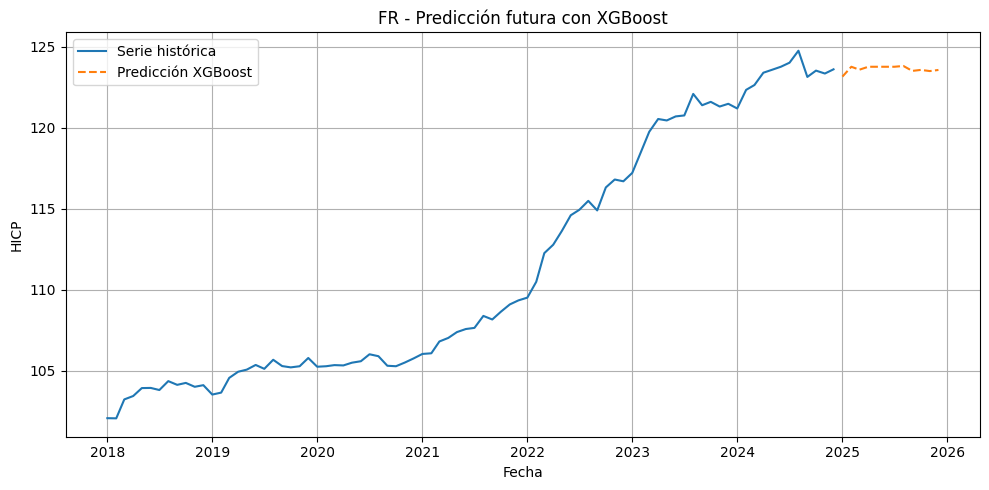


=== ES: Predicción futura con XGBoost ===


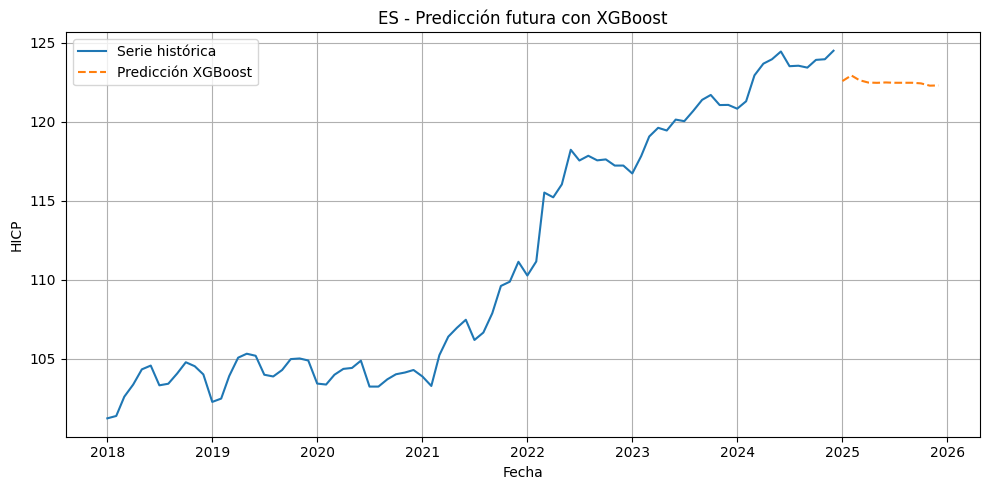


=== PL: Predicción futura con XGBoost ===


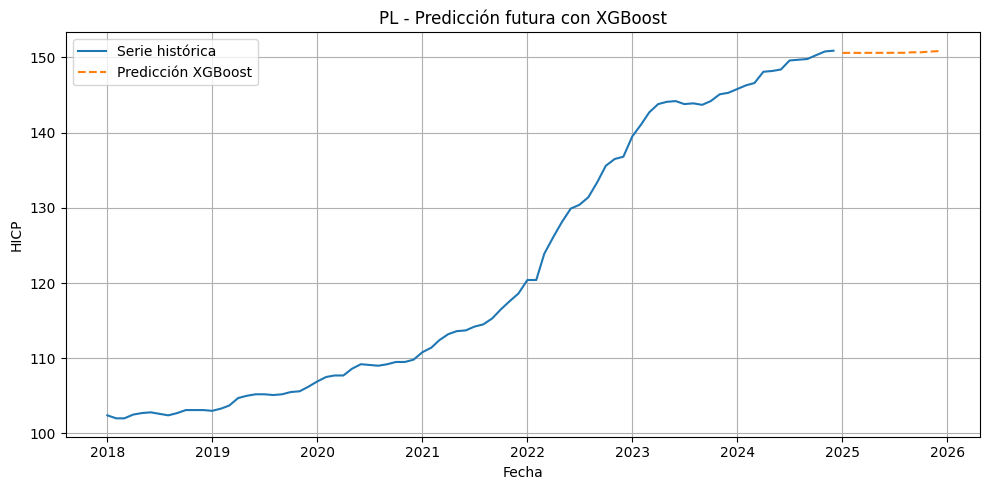


=== NL: Predicción futura con XGBoost ===


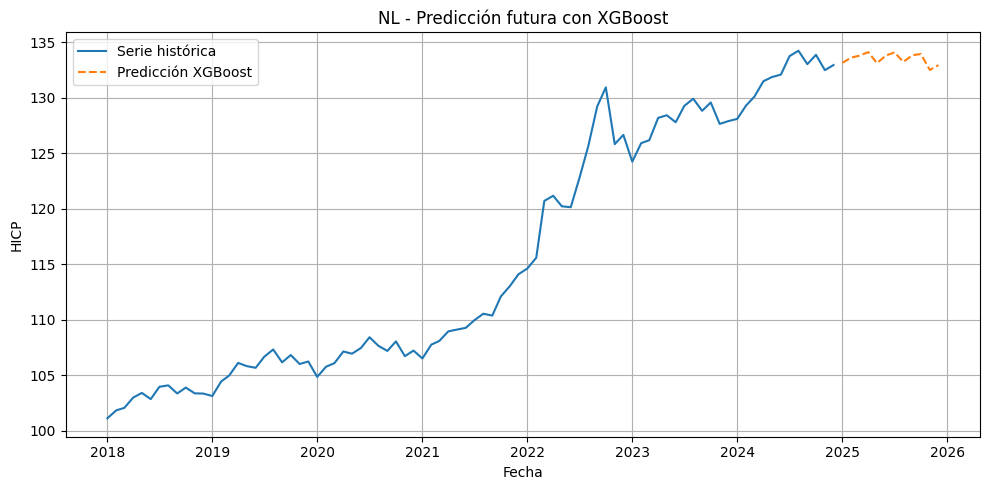


=== DE: Predicción futura con XGBoost ===


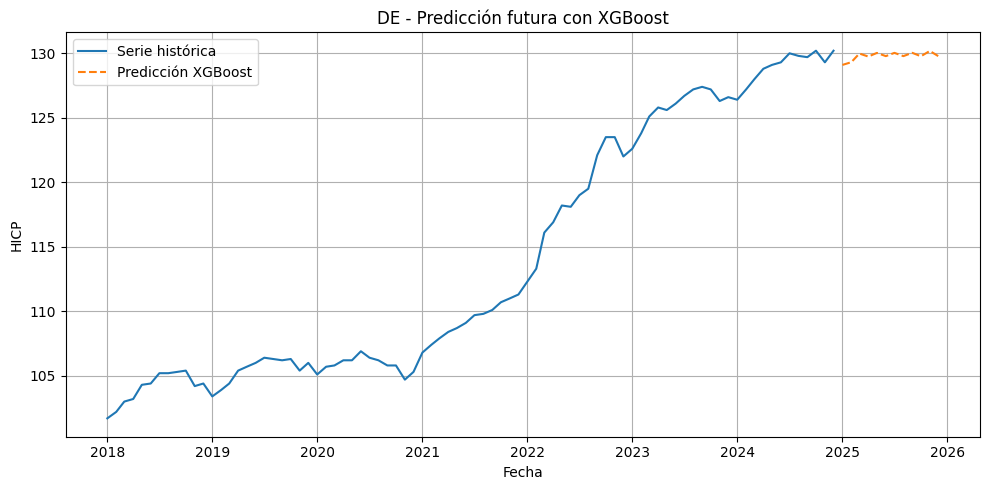

In [42]:
paises_sel
df_futuro_xgb = xgboost_pred_futuro_por_pais(paises_sel, pivot_multi, n_lags=2, n_periodos=12)

In [43]:
df_futuro_xgb

BE          IT          FR          ES          PL  \
2025-01-01  131.778854  121.174652  123.169365  122.570000  150.613190   
2025-02-01  133.192490  121.427261  123.778381  122.925476  150.613190   
2025-03-01  133.192490  122.014595  123.596962  122.624847  150.610901   
2025-04-01  133.192490  122.371872  123.778381  122.475311  150.615814   
2025-05-01  133.192490  122.573555  123.778381  122.457710  150.615814   
2025-06-01  133.192490  122.770325  123.778381  122.481209  150.618225   
2025-07-01  133.192490  122.249962  123.778381  122.461220  150.623993   
2025-08-01  133.907852  121.824745  123.827599  122.461220  150.623993   
2025-09-01  133.907852  122.905663  123.522484  122.461220  150.690125   
2025-10-01  133.907852  122.990463  123.584702  122.423027  150.690247   
2025-11-01  133.907852  122.858696  123.511879  122.278259  150.786469   
2025-12-01  134.048828  122.995277  123.581047  122.291733  150.844177   

                    NL          DE  
2025-01-01  133.129623  129.098541  
2025-02-01  133.601517  129.311218  
2025-03-01  133.773605  129.981461  
2025-04-01  134.093918  129.746933  
2025-05-01  133.102844  130.029526  
2025-06-01  133.780151  129.780365  
2025-07-01  134.070938  130.033203  
2025-08-01  133.213470  129.780365  
2025-09-01  133.811310  130.036469  
2025-10-01  133.922897  129.770233  
2025-11-01  132.489990  130.182281  
2025-12-01  132.923523  129.772675

In [57]:
df_futuro_xgb.to_csv("_HicpFuturo_XGBoost.csv")

## COMPARAR TODOS LOS PAISES

Comparación final de modelos,Comparación visual de predicciones de ARIMA, SARIMAX y XGBoost por país.

In [44]:
def comparar_modelos_futuro_todos(paises, df_arima, df_sarimax, df_xgb):
    for pais in paises:
        plt.figure(figsize=(10, 5))
        hay_datos = False

        if pais in df_arima.columns:
            plt.plot(df_arima[pais], label="ARIMA")
            hay_datos = True
        if pais in df_sarimax.columns:
            plt.plot(df_sarimax[pais], label="SARIMAX")
            hay_datos = True
        if pais in df_xgb.columns:
            plt.plot(df_xgb[pais], label="XGBoost")
            hay_datos = True

        if not hay_datos:
            print(f"{pais}: No hay predicciones disponibles en ningún modelo.")
            continue

        plt.title(f"{pais} - Comparación de modelos (predicción futura)")
        plt.xlabel("Fecha")
        plt.ylabel("HICP")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

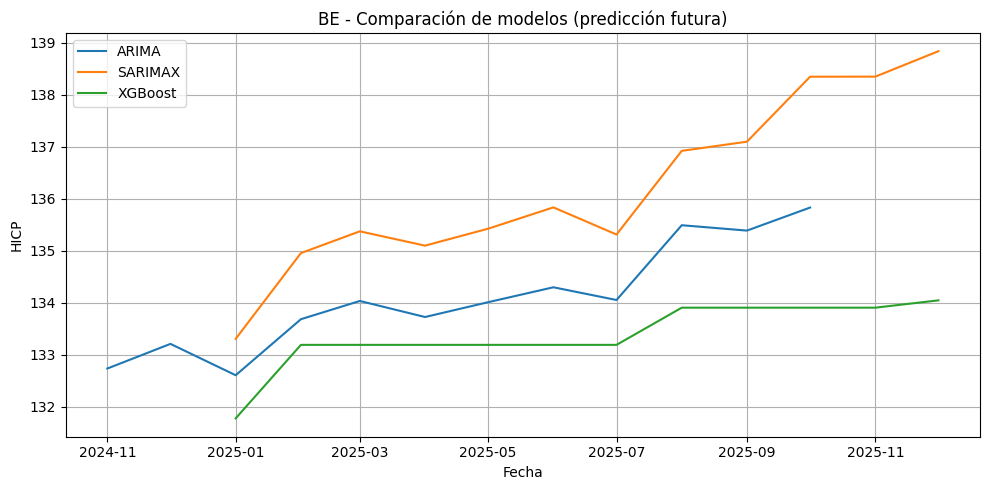

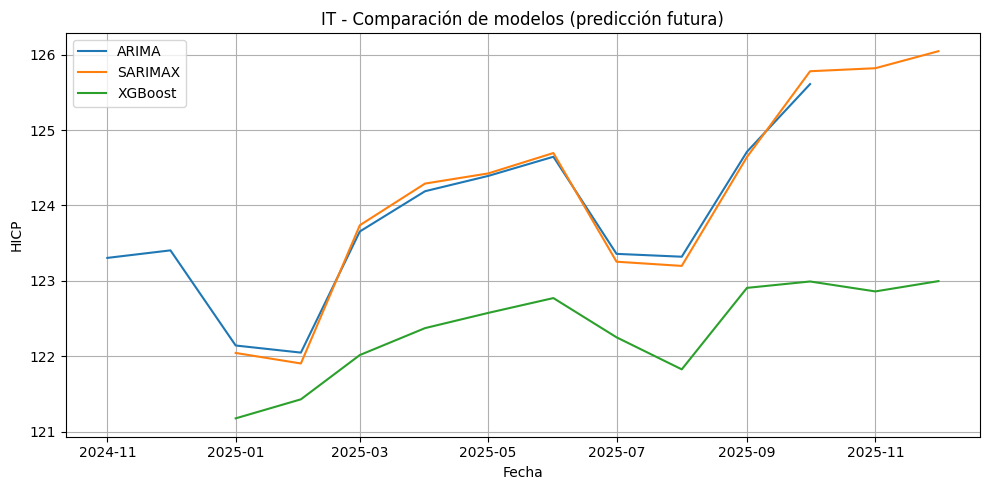

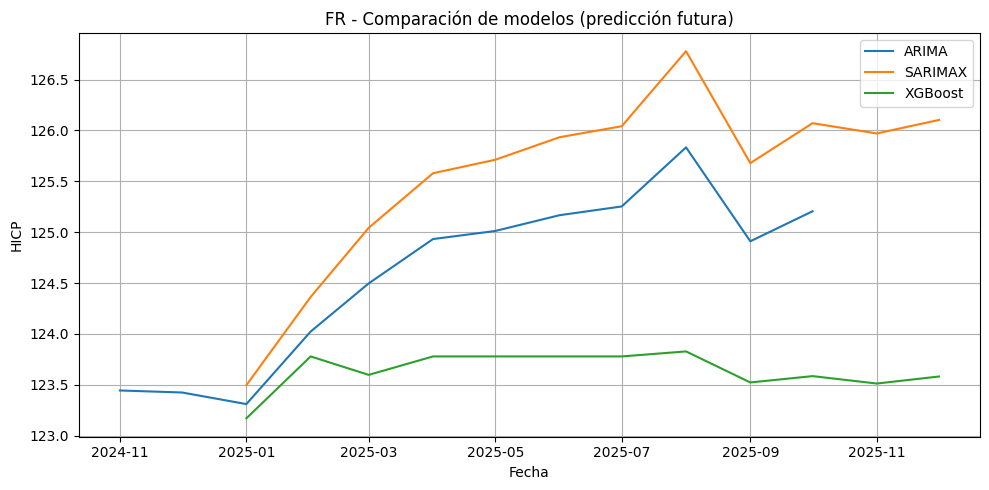

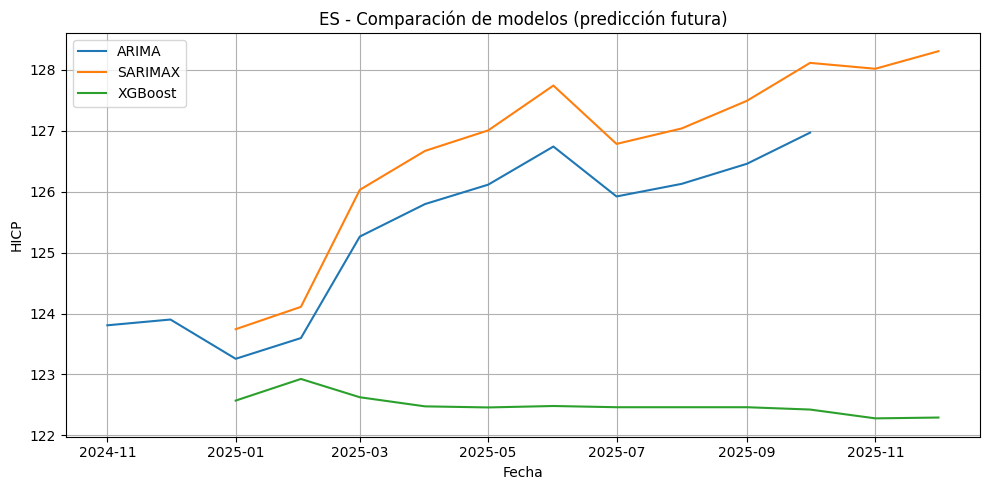

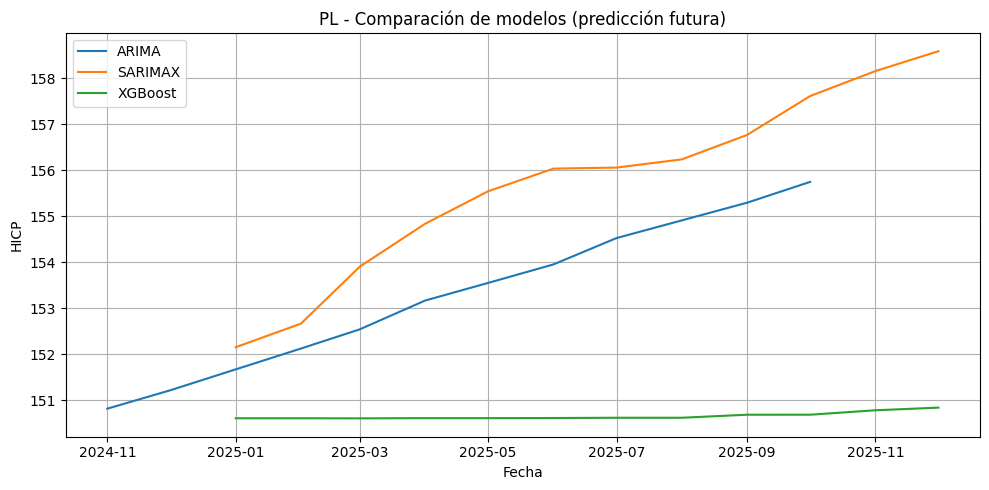

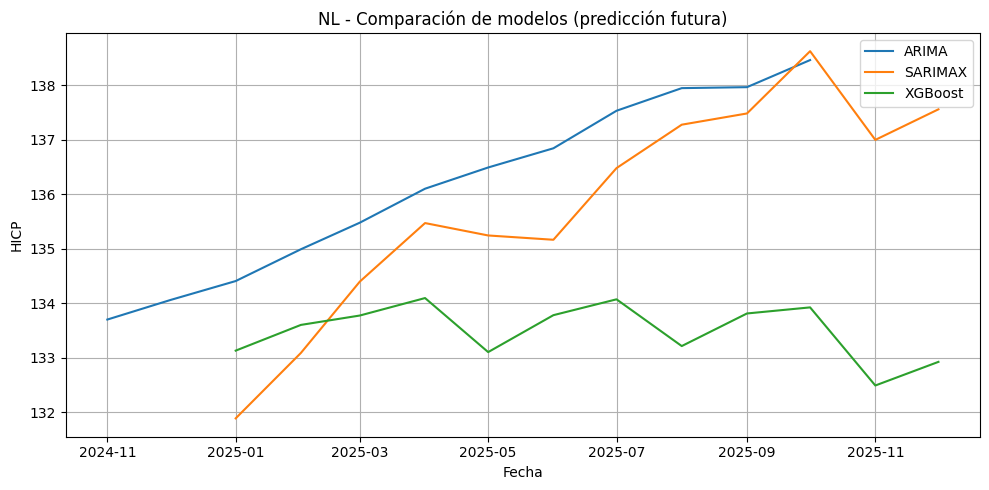

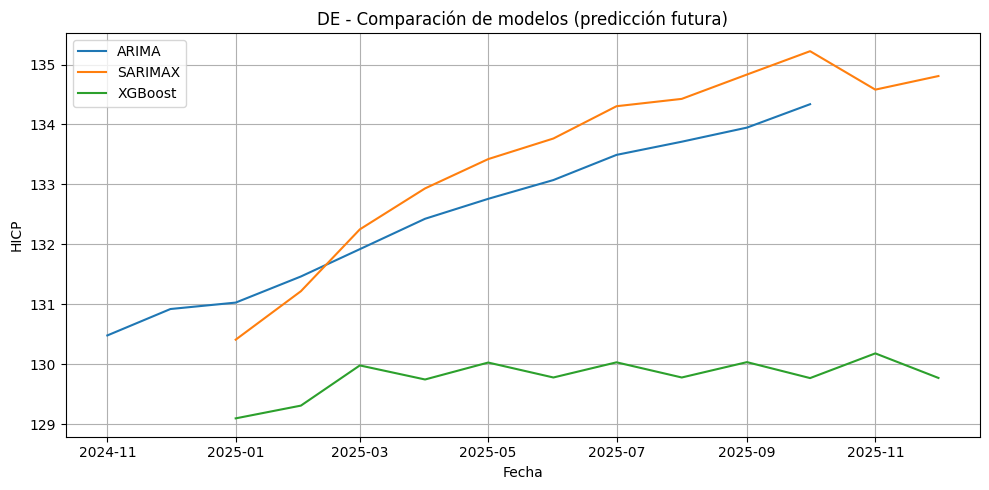

In [45]:
comparar_modelos_futuro_todos(paises_sel, df_predecir, df_futuro_sarimax, df_futuro_xgb)

## COMPARAR CON LOS DATOS REALES DEL 2025

In [60]:
df_2025 = pd.read_csv("C:\\Users\\Flore\\THEBRIDGE\\2503_dsft_thebridge_FlorenciaGD\\3-Machine_Learning\\ML_Guide\\ML_Finance_Florencia\\hicp_2025_reales.csv", parse_dates=['date'], index_col='date')
df_2025

BE     DE      ES      FR     IT      NL     PL
date                                                           
2018-01-01  103.82  101.7  101.22  102.06  100.6  101.12  102.4
2018-02-01  105.53  102.2  101.37  102.05  100.1  101.84  102.0
2018-03-01  105.56  103.0  102.59  103.22  102.4  102.06  102.0
2018-04-01  106.01  103.2  103.36  103.43  102.9  102.99  102.5
2018-05-01  106.38  104.3  104.32  103.92  103.2  103.41  102.7
...            ...    ...     ...     ...    ...     ...    ...
2024-08-01  132.73  129.8  123.54  124.77  121.6  134.22  149.7
2024-09-01  132.21  129.7  123.42  123.15  123.0  133.01  149.8
2024-10-01  132.90  130.2  123.91  123.54  123.4  133.85  150.3
2024-11-01  133.13  129.3  123.95  123.36  123.3  132.47  150.8
2024-12-01  134.12  130.2  124.49  123.62  123.4  132.93  150.9

[84 rows x 7 columns]

In [61]:
df_2025.head()
df_2025.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [58]:
# Si no nos pilla bien la fecha
df_2025['fecha_str'] = df_2025.index.astype(str)

df_2025[['year', 'month', 'day']] = df_2025['fecha_str'].str.split('-', expand=True)
df_2025['year'] = df_2025['year'].astype(int)
df_2025['month'] = df_2025['month'].astype(int)
df_2025['day'] = df_2025['day'].astype(int)

df_2025['new_date'] = pd.to_datetime(df_2025[['year', 'month', 'day']])
df_2025.head()

BE     DE      ES      FR     IT      NL     PL   fecha_str  \
date                                                                          
2018-01-01  103.82  101.7  101.22  102.06  100.6  101.12  102.4  2018-01-01   
2018-02-01  105.53  102.2  101.37  102.05  100.1  101.84  102.0  2018-02-01   
2018-03-01  105.56  103.0  102.59  103.22  102.4  102.06  102.0  2018-03-01   
2018-04-01  106.01  103.2  103.36  103.43  102.9  102.99  102.5  2018-04-01   
2018-05-01  106.38  104.3  104.32  103.92  103.2  103.41  102.7  2018-05-01   

            year  month  day   new_date  
date                                     
2018-01-01  2018      1    1 2018-01-01  
2018-02-01  2018      2    1 2018-02-01  
2018-03-01  2018      3    1 2018-03-01  
2018-04-01  2018      4    1 2018-04-01  
2018-05-01  2018      5    1 2018-05-01

In [59]:
df_2025.head()
df_2025.index

DatetimeIndex(['2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01',
               '2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
               '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01',
               '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01',
               '2021-01-01', '2021-02-01', '2021-03-01', '2021-04-01',
               '2021-05-01', '2021-06-01', '2021-07-01', '2021-08-01',
               '2021-09-01', '2021-10-01', '2021-11-01', '2021-12-01',
               '2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01', '2022-07-01', '2022-08-01',
      

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluar_modelos_con_datos_reales(predicciones_dict, reales_df, paises, nombre_modelo):
    errores = []

    for pais in paises:
        if pais not in predicciones_dict.columns or pais not in reales_df.columns:
            print(f"{pais}: no hay datos suficientes para comparación en {nombre_modelo}.")
            continue

        pred = predicciones_dict[pais].dropna()
        real = reales_df[pais].dropna()

        # Asegurar que ambos índices coinciden
        idx_comun = pred.index.intersection(real.index)
        if len(idx_comun) == 0:
            print(f"{pais}: no hay fechas en común.")
            continue

        rmse = np.sqrt(mean_squared_error(real[idx_comun], pred[idx_comun]))
        mae = mean_absolute_error(real[idx_comun], pred[idx_comun])

        errores.append({
            "País": pais,
            "Modelo": nombre_modelo,
            "RMSE": rmse,
            "MAE": mae
        })

    return pd.DataFrame(errores)

# Aplicar a cada modelo
errores_arima = evaluar_modelos_con_datos_reales(df_predecir, df_2025, paises_sel, "ARIMA")
errores_sarimax = evaluar_modelos_con_datos_reales(df_futuro_sarimax, df_2025, paises_sel, "SARIMAX")
errores_xgb = evaluar_modelos_con_datos_reales(df_futuro_xgb, df_2025, paises_sel, "XGBoost")

# Unir todo en un solo DataFrame
df_errores_2025 = pd.concat([errores_arima, errores_sarimax, errores_xgb])
print(df_errores_2025.sort_values(by=["País", "RMSE"]))


BE: no hay fechas en común.
IT: no hay fechas en común.
FR: no hay fechas en común.
ES: no hay fechas en común.
PL: no hay fechas en común.
NL: no hay fechas en común.
DE: no hay fechas en común.
BE: no hay fechas en común.
IT: no hay fechas en común.
FR: no hay fechas en común.
ES: no hay fechas en común.
PL: no hay fechas en común.
NL: no hay fechas en común.
DE: no hay fechas en común.
  País Modelo      RMSE       MAE
0   BE  ARIMA  0.699841  0.650591
6   DE  ARIMA  0.979227  0.951919
3   ES  ARIMA  0.428678  0.366326
2   FR  ARIMA  0.150909  0.140001
1   IT  ARIMA  0.003290  0.003289
5   NL  ARIMA  1.180234  1.179153
4   PL  ARIMA  0.228752  0.172158


In [54]:
errores_arima = evaluar_modelos_con_datos_reales(df_predecir, df_2025, paises_sel, "ARIMA")
errores_sarimax = evaluar_modelos_con_datos_reales(df_futuro_sarimax, df_2025, paises_sel, "SARIMAX")
errores_xgb = evaluar_modelos_con_datos_reales(df_futuro_xgb, df_2025, paises_sel, "XGBoost")

df_errores_2025 = pd.concat([errores_arima, errores_sarimax, errores_xgb])
df_errores_2025.sort_values(by=["País", "RMSE"])


BE: no hay fechas en común.
IT: no hay fechas en común.
FR: no hay fechas en común.
ES: no hay fechas en común.
PL: no hay fechas en común.
NL: no hay fechas en común.
DE: no hay fechas en común.
BE: no hay fechas en común.
IT: no hay fechas en común.
FR: no hay fechas en común.
ES: no hay fechas en común.
PL: no hay fechas en común.
NL: no hay fechas en común.
DE: no hay fechas en común.


País Modelo      RMSE       MAE
0   BE  ARIMA  0.699841  0.650591
6   DE  ARIMA  0.979227  0.951919
3   ES  ARIMA  0.428678  0.366326
2   FR  ARIMA  0.150909  0.140001
1   IT  ARIMA  0.003290  0.003289
5   NL  ARIMA  1.180234  1.179153
4   PL  ARIMA  0.228752  0.172158